In [1]:
import pandas as pd
import numpy as np

In [19]:
agriculture_file = '/Users/nancybaraka/Desktop/IronHack/Week 2/apy - apy.csv'  
df_agriculture = pd.read_csv(agriculture_file)
df_agriculture["Crop_Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [3]:
unique_districts = df_agriculture['District_Name'].unique()
unique_districts

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [7]:
pip install opencage

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import requests
from opencage.geocoder import OpenCageGeocode

In [11]:
# Initialize OpenCage API
api_key = '8d0e291fd34a4e4caf00e0916b07ccbe' 
geocoder = OpenCageGeocode(api_key)

# Initialize list to store district data with coordinates
district_coords = []

# Loop through each district and get latitude and longitude
for district in unique_districts:
    query = f"{district}, India"
    result = geocoder.geocode(query)
    
    if result and len(result):
        latitude = result[0]['geometry']['lat']
        longitude = result[0]['geometry']['lng']
        district_coords.append({'District': district, 'Latitude': latitude, 'Longitude': longitude})
    else:
        print(f"Coordinates not found for {district}")

# Convert the district data to a DataFrame
df_district_coords = pd.DataFrame(district_coords)

# Save the district coordinates to a CSV file
df_district_coords.to_csv('district_coordinates.csv', index=False)

print(df_district_coords.head())

                   District   Latitude  Longitude
0                  NICOBARS   8.000000  93.500000
1  NORTH AND MIDDLE ANDAMAN  12.611239  92.831654
2            SOUTH ANDAMANS  12.500290  92.750040
3                 ANANTAPUR  14.724220  77.430674
4                  CHITTOOR  13.202648  79.003225


In [ ]:
import requests
import pandas as pd

# Load the district coordinates
df_district_coords = pd.read_csv('district_coordinates.csv')

# Define the date range for NASA Power API
start_date = "2002-01-01"
end_date = "2022-12-31"

# Initialize an empty list to store weather data
weather_data = []

# Loop through the districts and fetch weather data for each one
for index, row in df_district_coords.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    
    # NASA Power API URL
    url = f"https://power.larc.nasa.gov/api/temporal/daily/point?parameters=T2M,PRECTOTCORR,WS10M&start={start_date.replace('-', '')}&end={end_date.replace('-', '')}&latitude={lat}&longitude={lon}&format=JSON&community=AG"
    
    # Fetch weather data
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        # Extract daily weather data
        temp_data = data['properties']['parameter'].get('T2M', {}).values()  # Temperature
        precip_data = data['properties']['parameter'].get('PRECTOTCORR', {}).values()  # Precipitation (corrected)
        wind_data = data['properties']['parameter'].get('WS10M', {}).values()  # Wind Speed
        
        # Append the data to the list
        for date, temp, precip, wind in zip(data['properties']['parameter']['T2M'].keys(), temp_data, precip_data, wind_data):
            weather_data.append({'District': row['District'], 'Date': date, 'Temperature': temp, 'Precipitation': precip, 'WindSpeed': wind})
    
    else:
        print(f"Failed to fetch data for {row['District']}")

# Convert the weather data into a DataFrame
df_weather = pd.DataFrame(weather_data)

# Save the weather data to a CSV file
df_weather.to_csv('weather_data_nasa.csv', index=False)

print(df_weather.head())

In [12]:
weather_file = '/Users/nancybaraka/Desktop/IronHack/Week 2/weather_data_nasa.csv'  
df_weather = pd.read_csv(weather_file)
df_weather

District      Date  Temperature  Precipitation  WindSpeed
0        NICOBARS  20020101        27.43           1.08       7.48
1        NICOBARS  20020102        27.41           5.25       7.70
2        NICOBARS  20020103        27.48           1.37       9.54
3        NICOBARS  20020104        27.35           0.16       9.01
4        NICOBARS  20020105        27.47           0.23       8.38
...           ...       ...          ...            ...        ...
4954815   PURULIA  20221227        20.76           0.00       1.80
4954816   PURULIA  20221228        17.11           0.00       2.38
4954817   PURULIA  20221229        15.19           0.00       2.37
4954818   PURULIA  20221230        15.76           0.00       2.16
4954819   PURULIA  20221231        17.41           0.00       1.31

[4954820 rows x 5 columns]

In [21]:

df_weather['Date'] = pd.to_datetime(df_weather['Date'], format='%Y%m%d')


df_weather['Year'] = df_weather['Date'].dt.year


print(df_weather.head())


   District       Date  Temperature  Precipitation  WindSpeed  Year
0  NICOBARS 2002-01-01        27.43           1.08       7.48  2002
1  NICOBARS 2002-01-02        27.41           5.25       7.70  2002
2  NICOBARS 2002-01-03        27.48           1.37       9.54  2002
3  NICOBARS 2002-01-04        27.35           0.16       9.01  2002
4  NICOBARS 2002-01-05        27.47           0.23       8.38  2002


In [23]:
df_weather["Year"].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int32)

In [29]:
df_weather["District"].unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [25]:
df_agriculture['Year'] = pd.to_datetime(df_agriculture['Crop_Year'], format='%Y').dt.year
df_agriculture['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int32)

In [178]:
df_agriculture["District"] = df_agriculture["District_Name"]

In [37]:
df_merged = pd.merge(df_agriculture, df_weather, on=['District', 'Year'], how='inner')

df_merged.head()

State_Name District_Name  Crop_Year  Season  Crop   Area  \
0  Andaman and Nicobar Islands      NICOBARS       2002  Kharif  Rice  189.2   
1  Andaman and Nicobar Islands      NICOBARS       2002  Kharif  Rice  189.2   
2  Andaman and Nicobar Islands      NICOBARS       2002  Kharif  Rice  189.2   
3  Andaman and Nicobar Islands      NICOBARS       2002  Kharif  Rice  189.2   
4  Andaman and Nicobar Islands      NICOBARS       2002  Kharif  Rice  189.2   

   Production  Year  District       Date  Temperature  Precipitation  \
0      510.84  2002  NICOBARS 2002-01-01        27.43           1.08   
1      510.84  2002  NICOBARS 2002-01-02        27.41           5.25   
2      510.84  2002  NICOBARS 2002-01-03        27.48           1.37   
3      510.84  2002  NICOBARS 2002-01-04        27.35           0.16   
4      510.84  2002  NICOBARS 2002-01-05        27.47           0.23   

   WindSpeed  
0       7.48  
1       7.70  
2       9.54  
3       9.01  
4       8.38

In [180]:
df_merged["State_Name"].sort_values(ascending=True).unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [39]:
#Group by 'District' and 'Year' and calculate the average for weather-related columns
df_weather_aggregated = df_merged.groupby(['District', 'Year']).agg({
    'Temperature': 'mean',
    'Precipitation': 'mean',
    'WindSpeed': 'mean'
}).reset_index()

df_weather_aggregated.head()


District  Year  Temperature  Precipitation  WindSpeed
0  24 PARAGANAS NORTH  2002     7.237589       2.028384   2.378986
1  24 PARAGANAS NORTH  2003     7.283918       2.173425   2.449315
2  24 PARAGANAS NORTH  2004     7.269098       2.153333   2.461803
3  24 PARAGANAS NORTH  2005     7.374274       2.340027   2.414630
4  24 PARAGANAS NORTH  2006     7.820356       2.087205   2.379014

In [41]:
# Merge the aggregated weather data back with the agricultural data
df_final = pd.merge(df_agriculture, df_weather_aggregated, on=['District', 'Year'], how='inner')

df_final.head()

State_Name District_Name  Crop_Year      Season  \
0  Andaman and Nicobar Islands      NICOBARS       2002      Kharif   
1  Andaman and Nicobar Islands      NICOBARS       2002  Whole Year   
2  Andaman and Nicobar Islands      NICOBARS       2002  Whole Year   
3  Andaman and Nicobar Islands      NICOBARS       2002  Whole Year   
4  Andaman and Nicobar Islands      NICOBARS       2002  Whole Year   

           Crop    Area  Production  Year  District  Temperature  \
0          Rice   189.2      510.84  2002  NICOBARS    27.929014   
1      Arecanut  1258.0     2083.00  2002  NICOBARS    27.929014   
2        Banana   213.0     1278.00  2002  NICOBARS    27.929014   
3  Black pepper    63.0       13.50  2002  NICOBARS    27.929014   
4     Cashewnut   719.0      208.00  2002  NICOBARS    27.929014   

   Precipitation  WindSpeed  
0       5.008219   5.889342  
1       5.008219   5.889342  
2       5.008219   5.889342  
3       5.008219   5.889342  
4       5.008219   5.889342

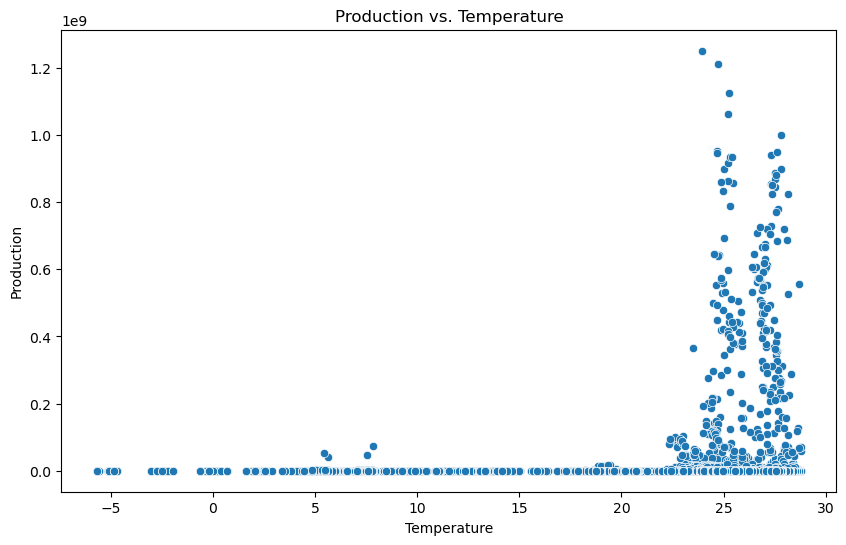

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Production vs Temperature
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Production', data=df_final)
plt.title('Production vs. Temperature')
plt.show()

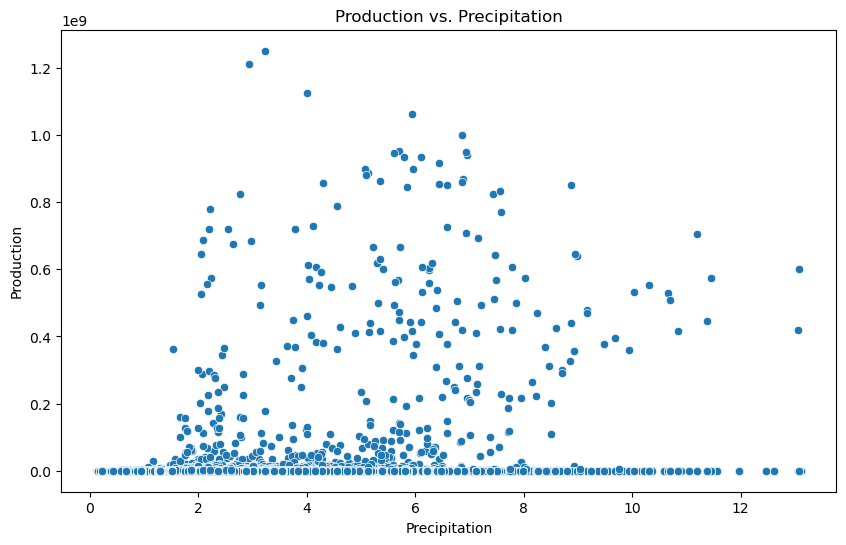

In [105]:
# Plot Production vs Precipitation
plt.figure(figsize=(10,6))
sns.scatterplot(x='Precipitation', y='Production', data=df_final)
plt.title('Production vs. Precipitation')
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


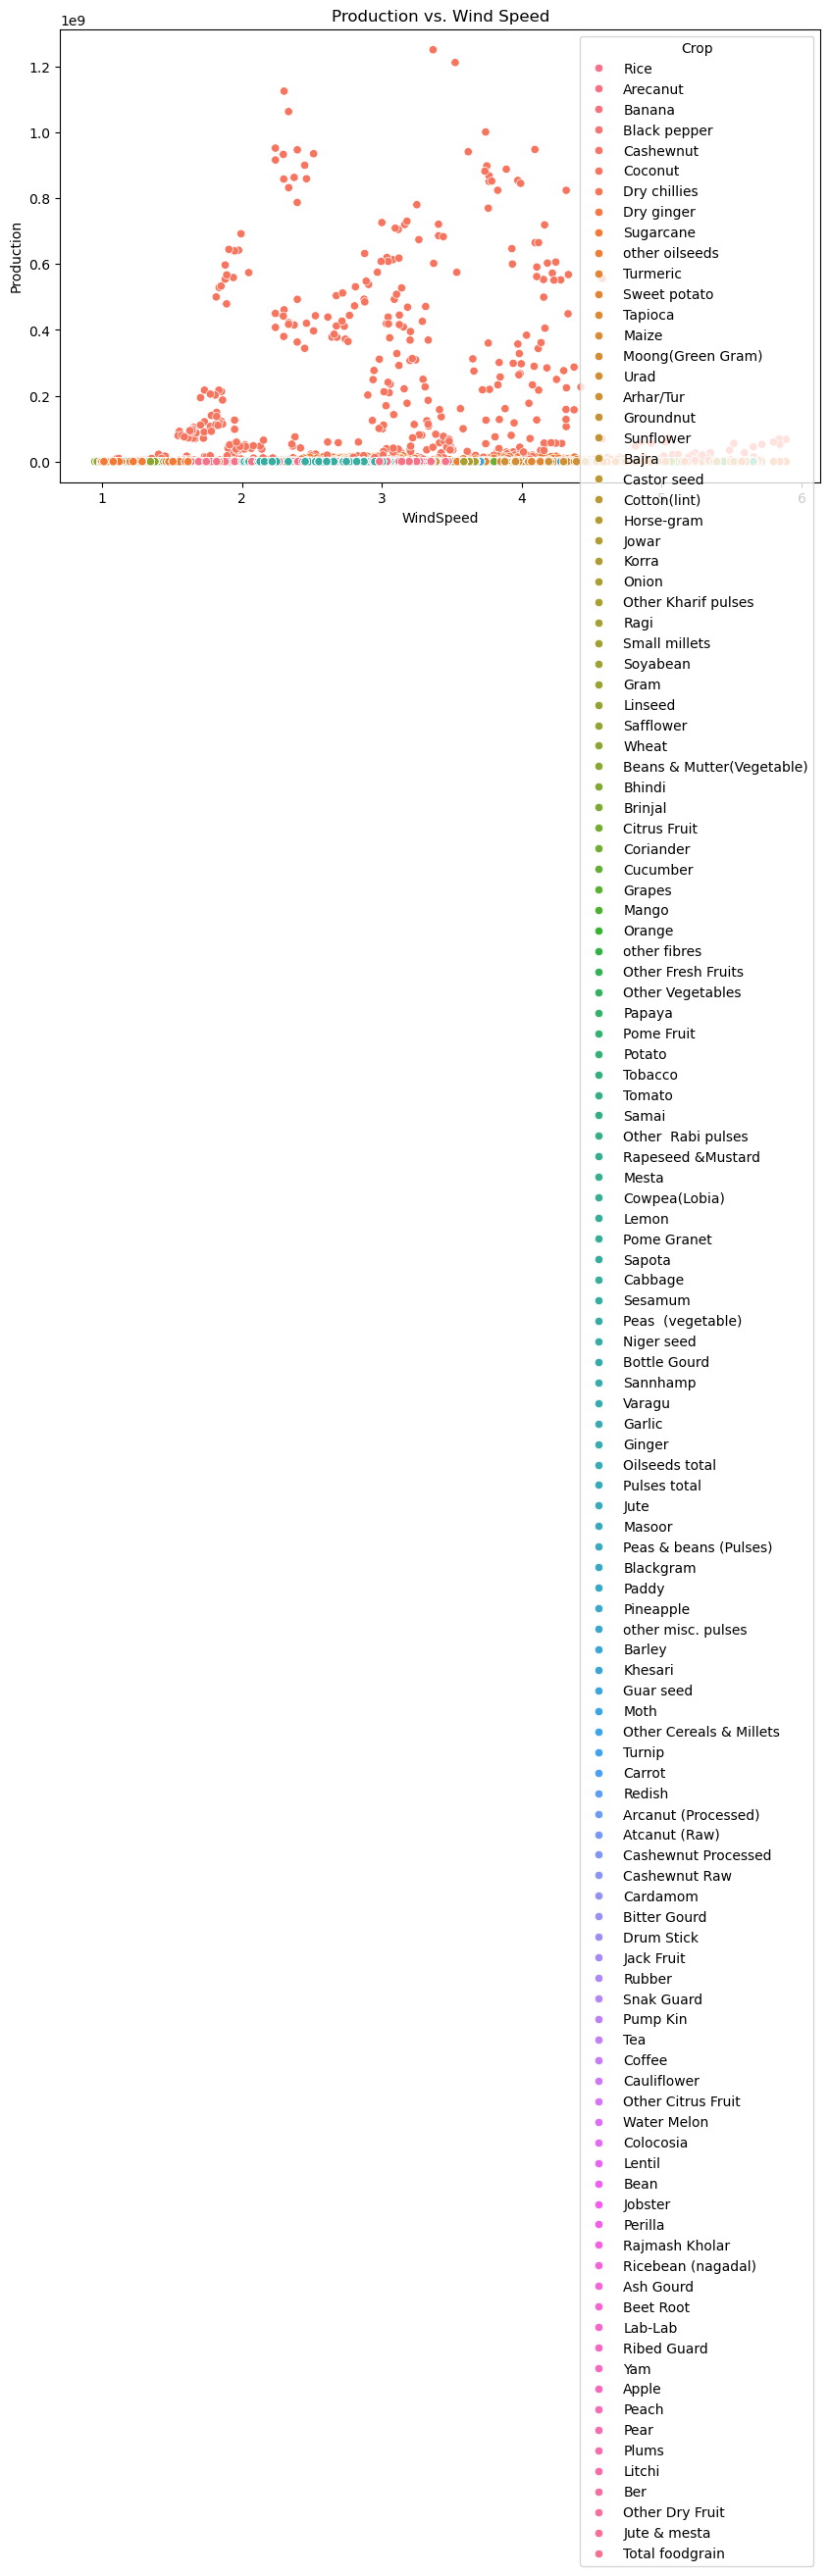

In [48]:

# Plot Production vs WindSpeed
plt.figure(figsize=(10,6))
sns.scatterplot(x='WindSpeed', y='Production', data=df_final, hue='Crop')
plt.title('Production vs. Wind Speed')
plt.show()

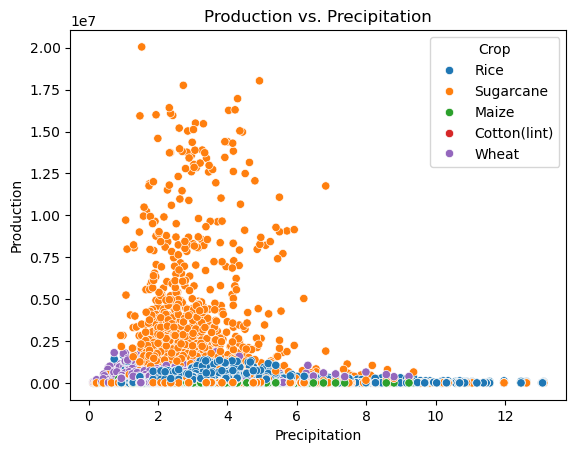

In [51]:
# Limit the number of crops in the legend
limited_crops = df_final['Crop'].isin(['Rice', 'Sugarcane', 'Wheat', 'Maize', 'Cotton(lint)'])
sns.scatterplot(x='Precipitation', y='Production', data=df_final[limited_crops], hue='Crop')
plt.title('Production vs. Precipitation')
plt.show()

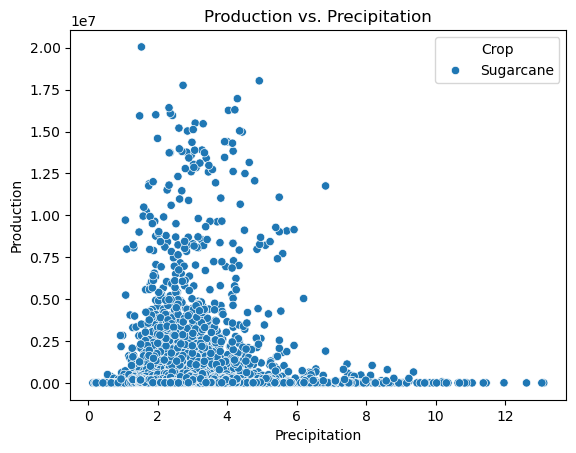

In [57]:
# Limit the number of crops in the legend
limited_crops = df_final['Crop'].isin(['Sugarcane'])
sns.scatterplot(x='Precipitation', y='Production', data=df_final[limited_crops], hue='Crop')
plt.title('Production vs. Precipitation')
plt.show()

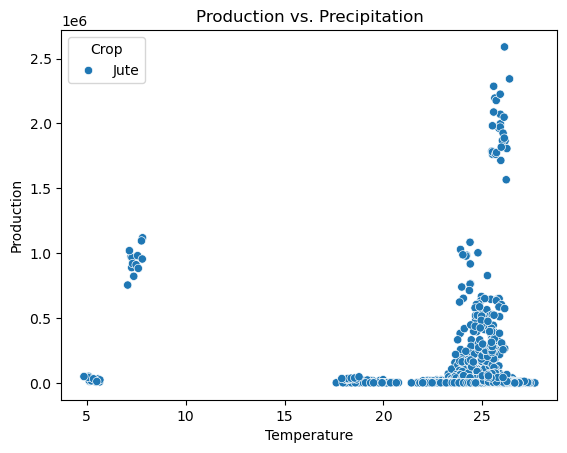

In [117]:
# Limit the number of crops in the legend
limited_crops = df_final['Crop'].isin(['Jute'])
sns.scatterplot(x='Temperature', y='Production', data=df_final[limited_crops], hue='Crop')
plt.title('Production vs. Precipitation')
plt.show()

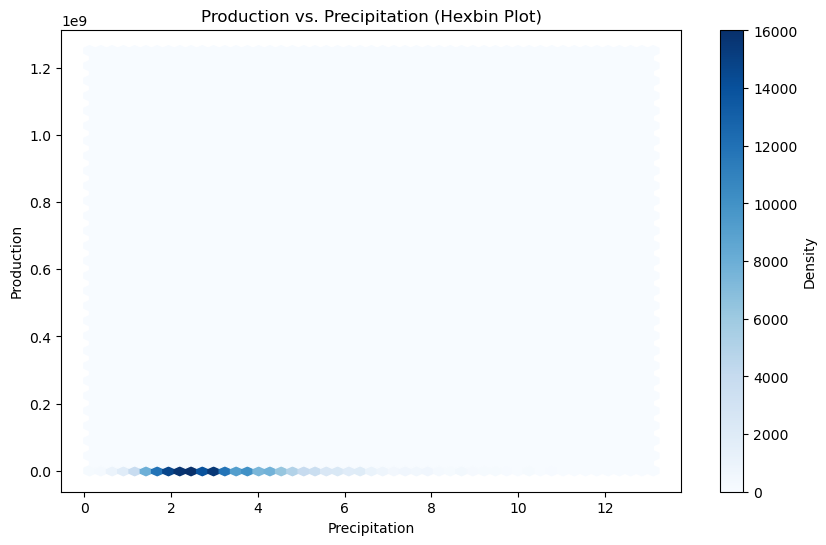

In [53]:
# Use hexbin plot for better density representation
plt.figure(figsize=(10, 6))
plt.hexbin(df_final['Precipitation'], df_final['Production'], gridsize=50, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Precipitation')
plt.ylabel('Production')
plt.title('Production vs. Precipitation (Hexbin Plot)')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


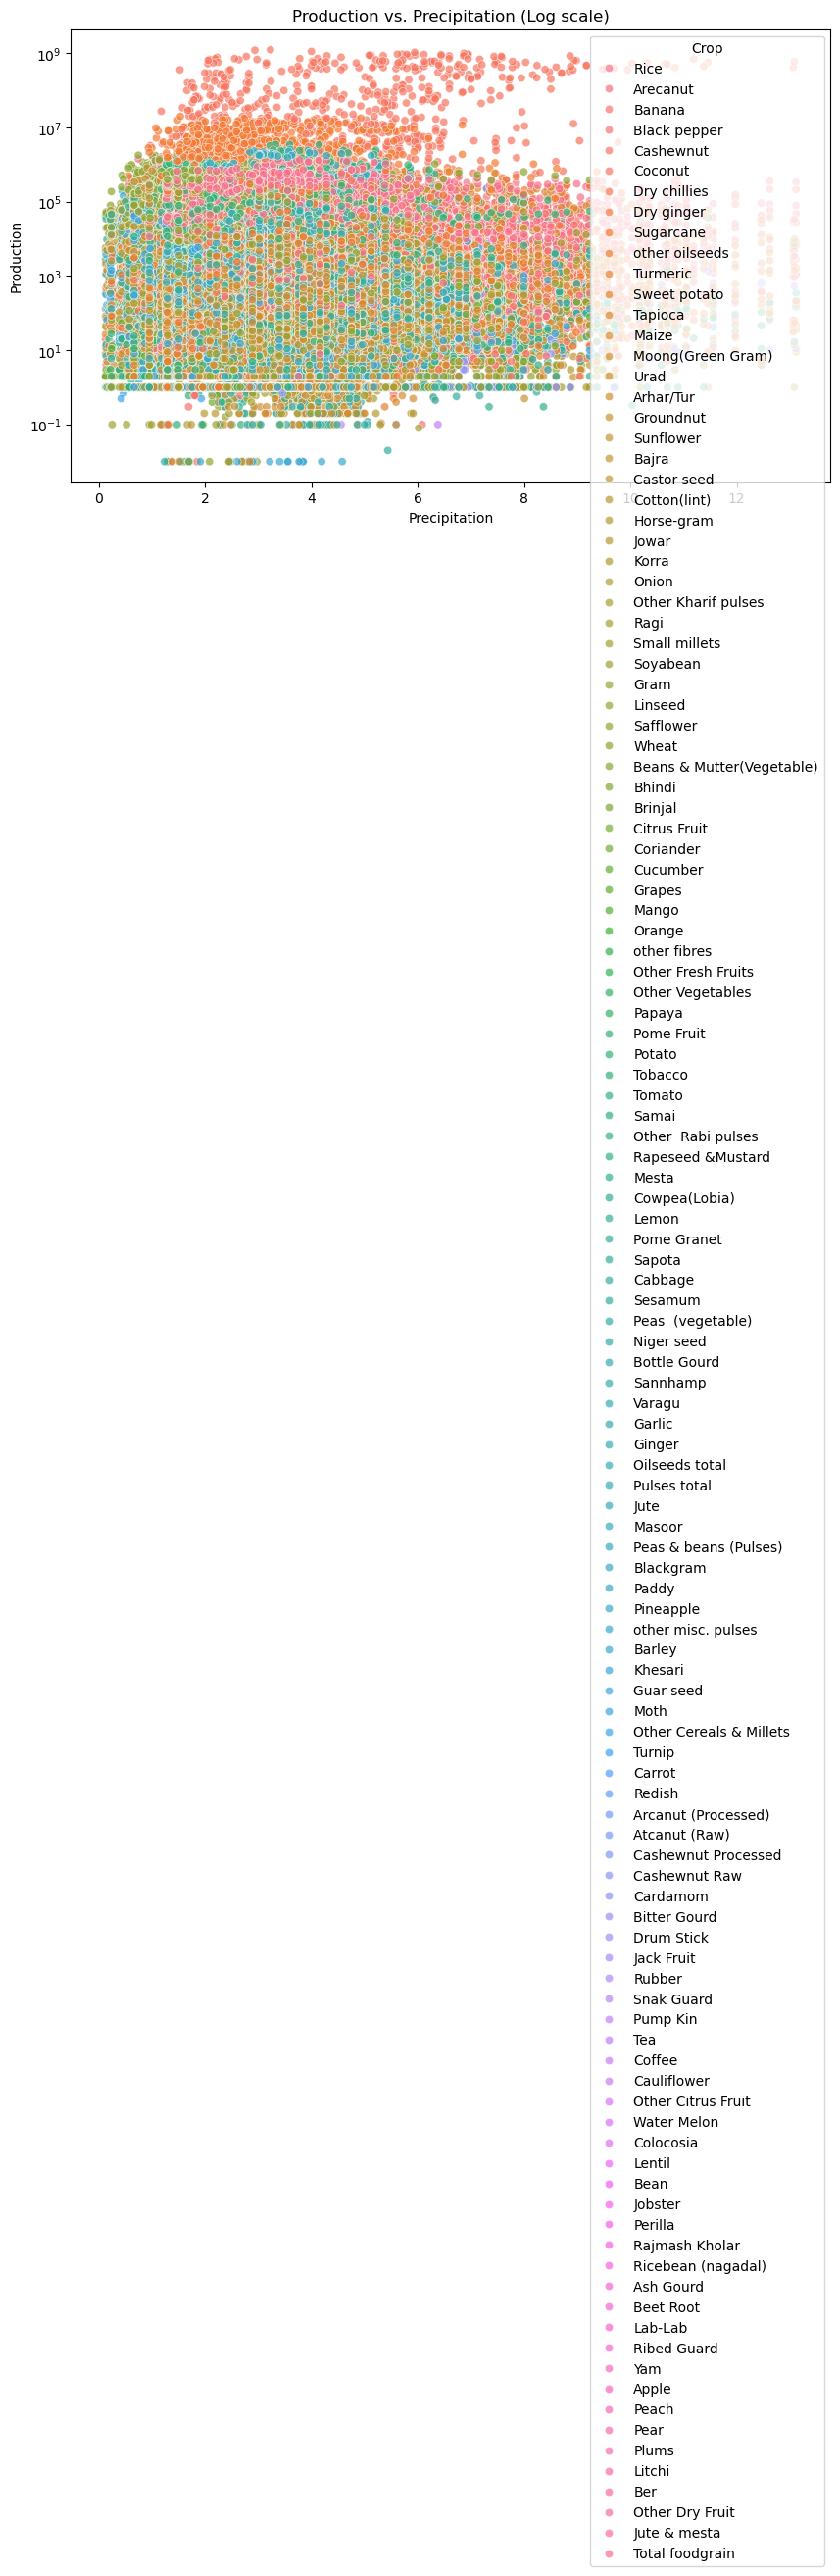

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Precipitation', y='Production', data=df_final, hue='Crop', alpha=0.7)
plt.yscale('log')  # Apply log scale to y-axis (Production)
plt.title('Production vs. Precipitation (Log scale)')
plt.show()

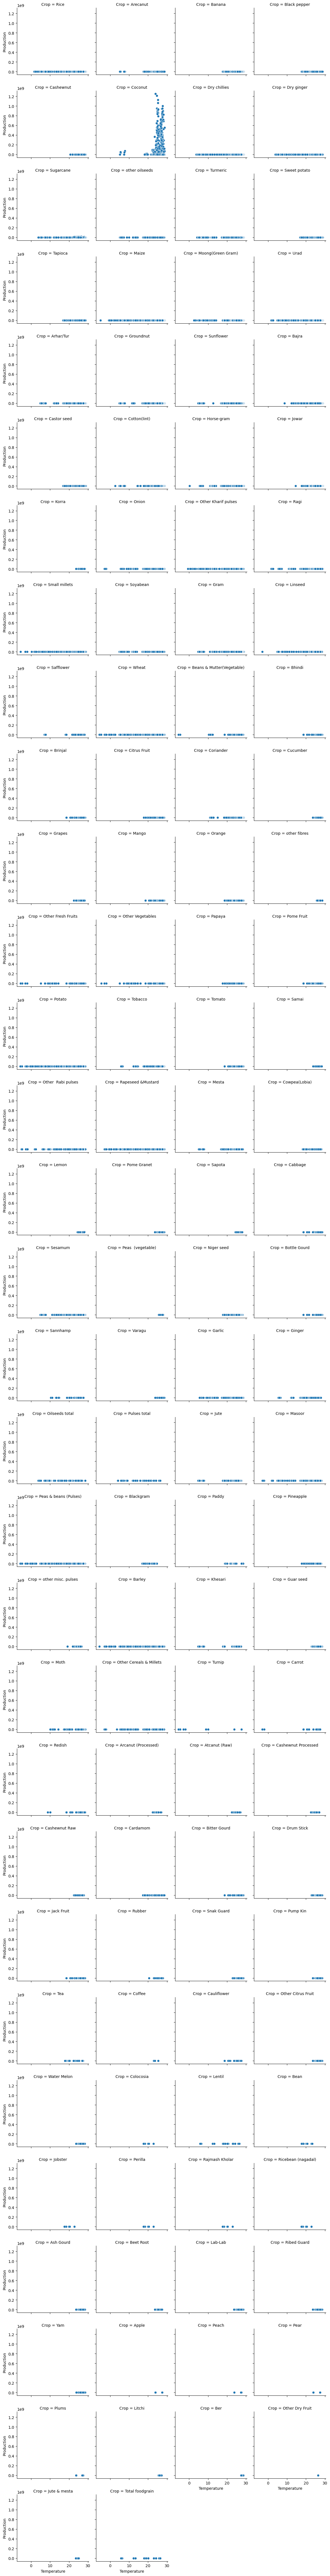

In [107]:
g = sns.FacetGrid(df_final, col="Crop", col_wrap=4)
g.map(sns.scatterplot, "Temperature", "Production")
plt.show()

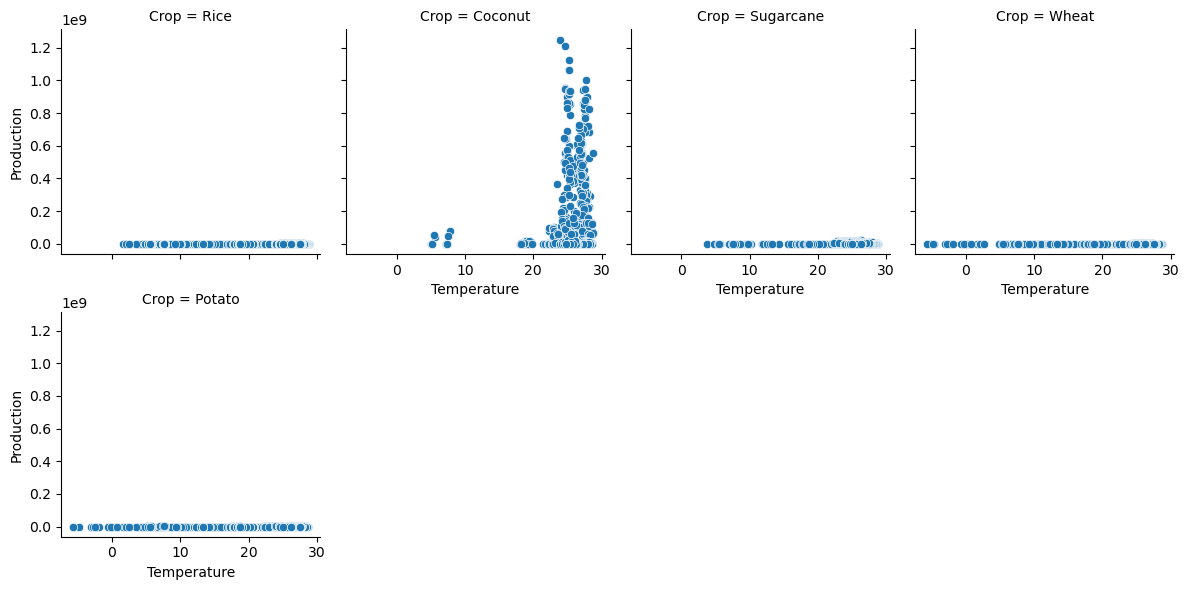

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by crop and sum the production values
top_crops = df_final.groupby("Crop")["Production"].sum().nlargest(5).index

# Filter the dataset to include only the top 5 crops
df_top_crops = df_final[df_final['Crop'].isin(top_crops)]

# Create the FacetGrid plot for the top 5 crops
g = sns.FacetGrid(df_top_crops, col="Crop", col_wrap=4)
g.map(sns.scatterplot, "Temperature", "Production")

# Show the plot
plt.show()

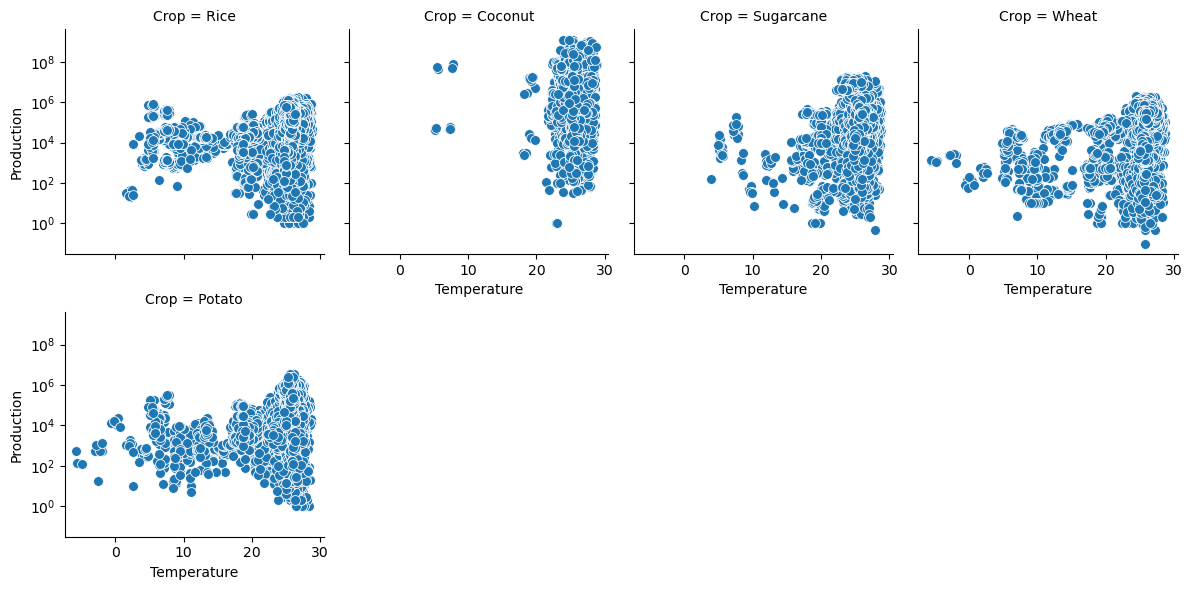

In [113]:
# Create the FacetGrid plot for the top 5 crops
g = sns.FacetGrid(df_top_crops, col="Crop", col_wrap=4)
g.map(sns.scatterplot, "Temperature", "Production", s=50)  # Increase marker size

# Set y-axis to a logarithmic scale
for ax in g.axes.flat:
    ax.set_yscale('log')

# Show the plot
plt.show()

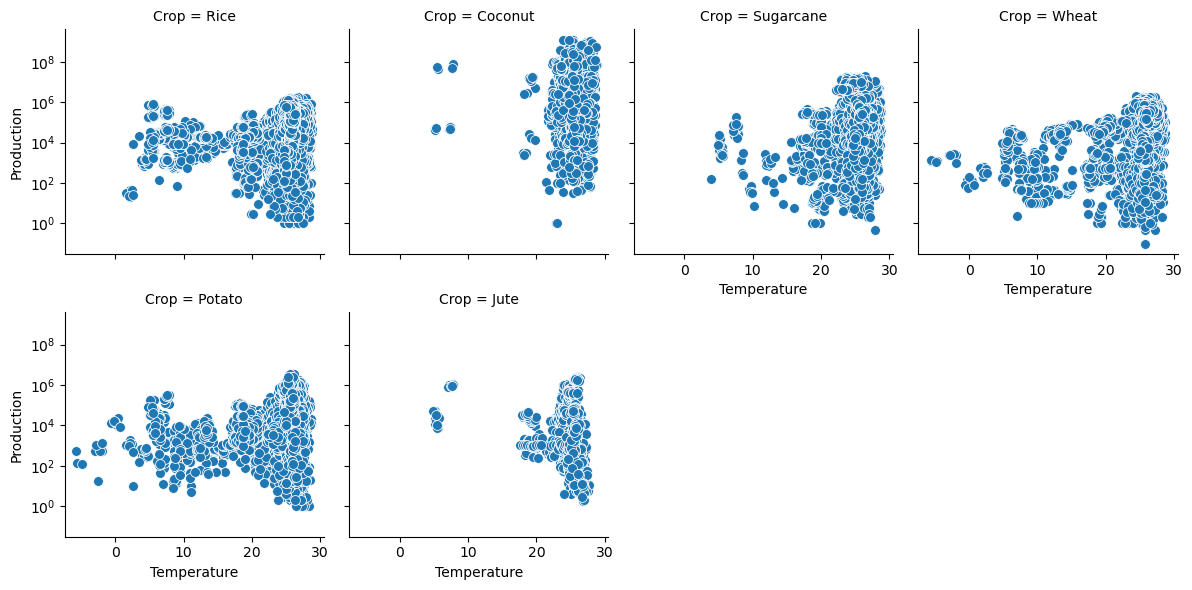

In [119]:
# Filter for the top 5 crops plus Jute
top_5_crops = df_final.groupby('Crop')['Production'].sum().nlargest(5).index.tolist()

top_5_crops.append('Jute')

# Filter the dataframe for these crops
df_top_crops_jute = df_final[df_final['Crop'].isin(top_5_crops)]

# Create the FacetGrid plot for the top 5 crops and Jute
g = sns.FacetGrid(df_top_crops_jute, col="Crop", col_wrap=4)
g.map(sns.scatterplot, "Temperature", "Production", s=50)  # Increase marker size

# Set y-axis to a logarithmic scale
for ax in g.axes.flat:
    ax.set_yscale('log')

# Show the plot
plt.show()


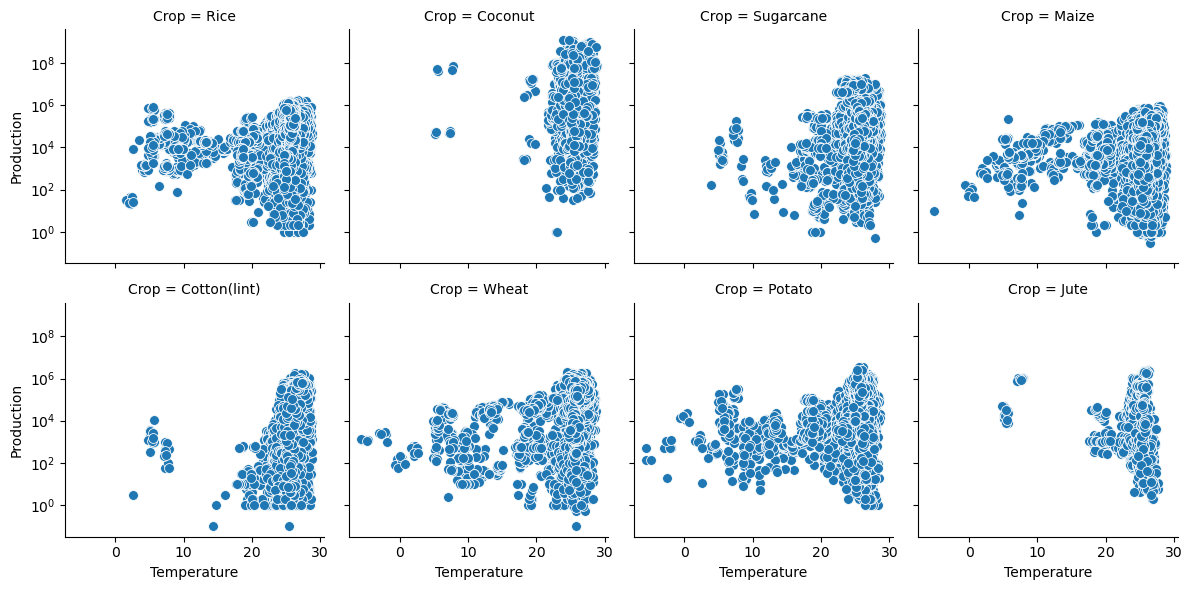

In [121]:
# Filter for the top 7 crops plus Jute
top_7_crops = df_final.groupby('Crop')['Production'].sum().nlargest(7).index.tolist()

top_7_crops.append('Jute')

# Filter the dataframe for these crops
df_top7_crops_jute = df_final[df_final['Crop'].isin(top_7_crops)]

# Create the FacetGrid plot for the top 5 crops and Jute
g = sns.FacetGrid(df_top7_crops_jute, col="Crop", col_wrap=4)
g.map(sns.scatterplot, "Temperature", "Production", s=50)  # Increase marker size

# Set y-axis to a logarithmic scale
for ax in g.axes.flat:
    ax.set_yscale('log')

# Show the plot
plt.show()


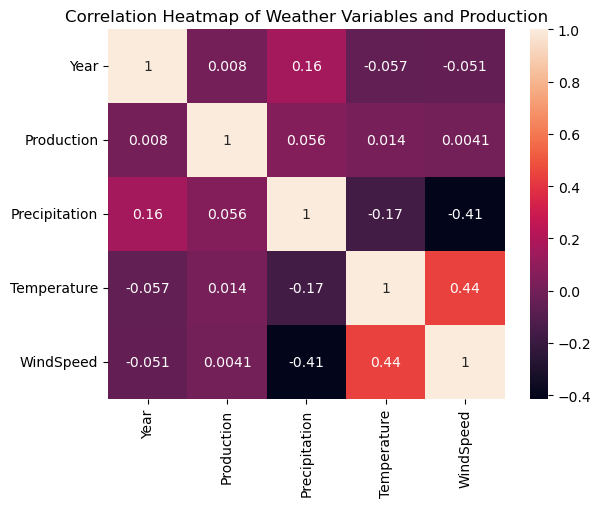

In [146]:
df_grouped = df_final.groupby(['District', 'Year', 'Crop']).agg({
    'Production': 'sum',
    'Precipitation': 'mean',
    'Temperature': 'mean',
    'WindSpeed':'mean'
}).reset_index()

# Ensure you select only numeric columns for correlation
numeric_columns = df_grouped.select_dtypes(include='number')

# Now, calculate the correlation matrix
sns.heatmap(numeric_columns.corr(), annot=True)
plt.title('Correlation Heatmap of Weather Variables and Production')
plt.show()

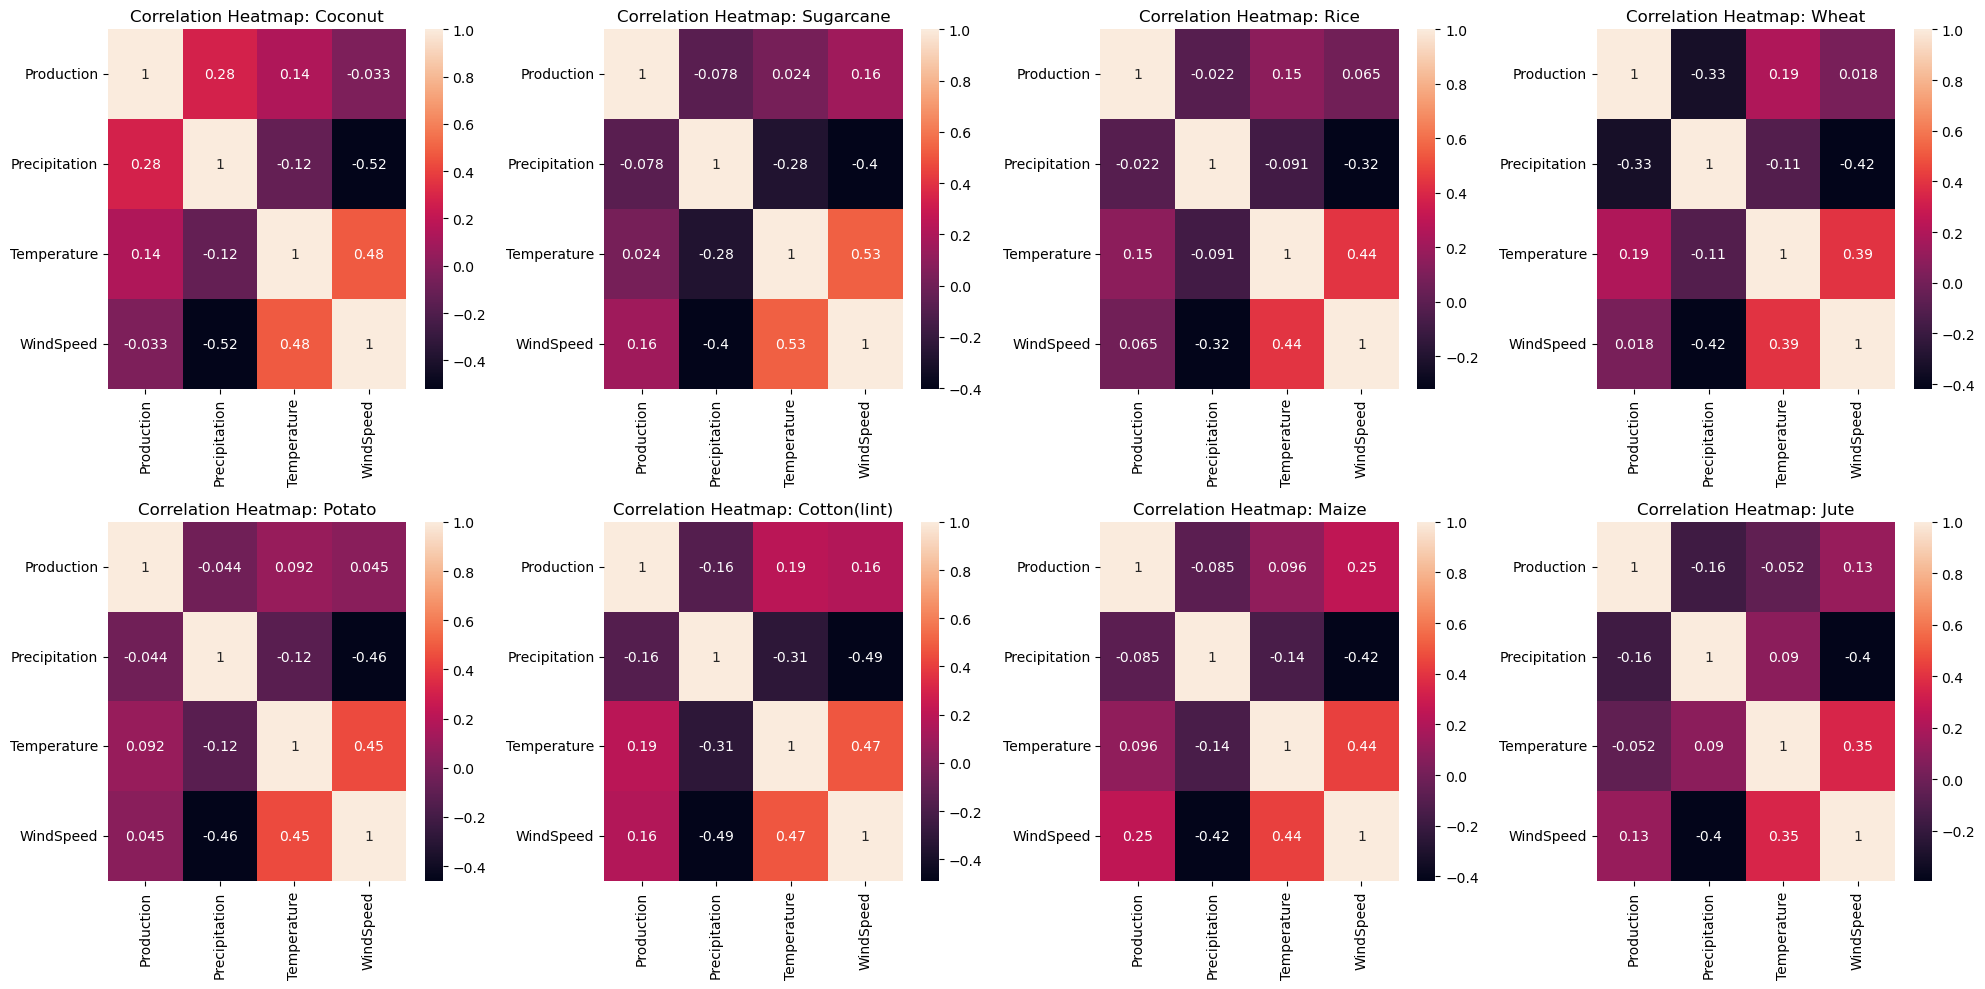

In [148]:
# Get the top 7 crops by production
top_7_crops = df_final.groupby('Crop')['Production'].sum().nlargest(7).index.tolist()

# Add "Jute" to the list if it's not already in the top 7
if 'Jute' not in top_7_crops:
    top_7_crops.append('Jute')

# Filter the dataframe for these crops
df_top_crops_jute = df_final[df_final['Crop'].isin(top_7_crops)]

import matplotlib.pyplot as plt

# Create a figure with subplots to hold 8 heatmaps (2 rows of 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Flatten axes to easily iterate over them
axes = axes.flatten()

# Loop over each crop and generate a heatmap
for i, crop in enumerate(top_7_crops):
    # Filter data for the specific crop
    df_crop = df_top_crops_jute[df_top_crops_jute['Crop'] == crop]
    
    # Group by District and Year to calculate mean values for the heatmap
    df_grouped_crop = df_crop.groupby(['District', 'Year']).agg({
        'Production': 'sum',
        'Precipitation': 'mean',
        'Temperature': 'mean',
        'WindSpeed': 'mean'
    }).reset_index()
    
    # Select only numeric columns for the heatmap
    numeric_columns = df_grouped_crop[['Production', 'Precipitation', 'Temperature','WindSpeed']]
    
    # Plot heatmap for this crop
    sns.heatmap(numeric_columns.corr(), annot=True, ax=axes[i])
    axes[i].set_title(f'Correlation Heatmap: {crop}')

# Adjust layout
plt.tight_layout()
plt.show()

In [129]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


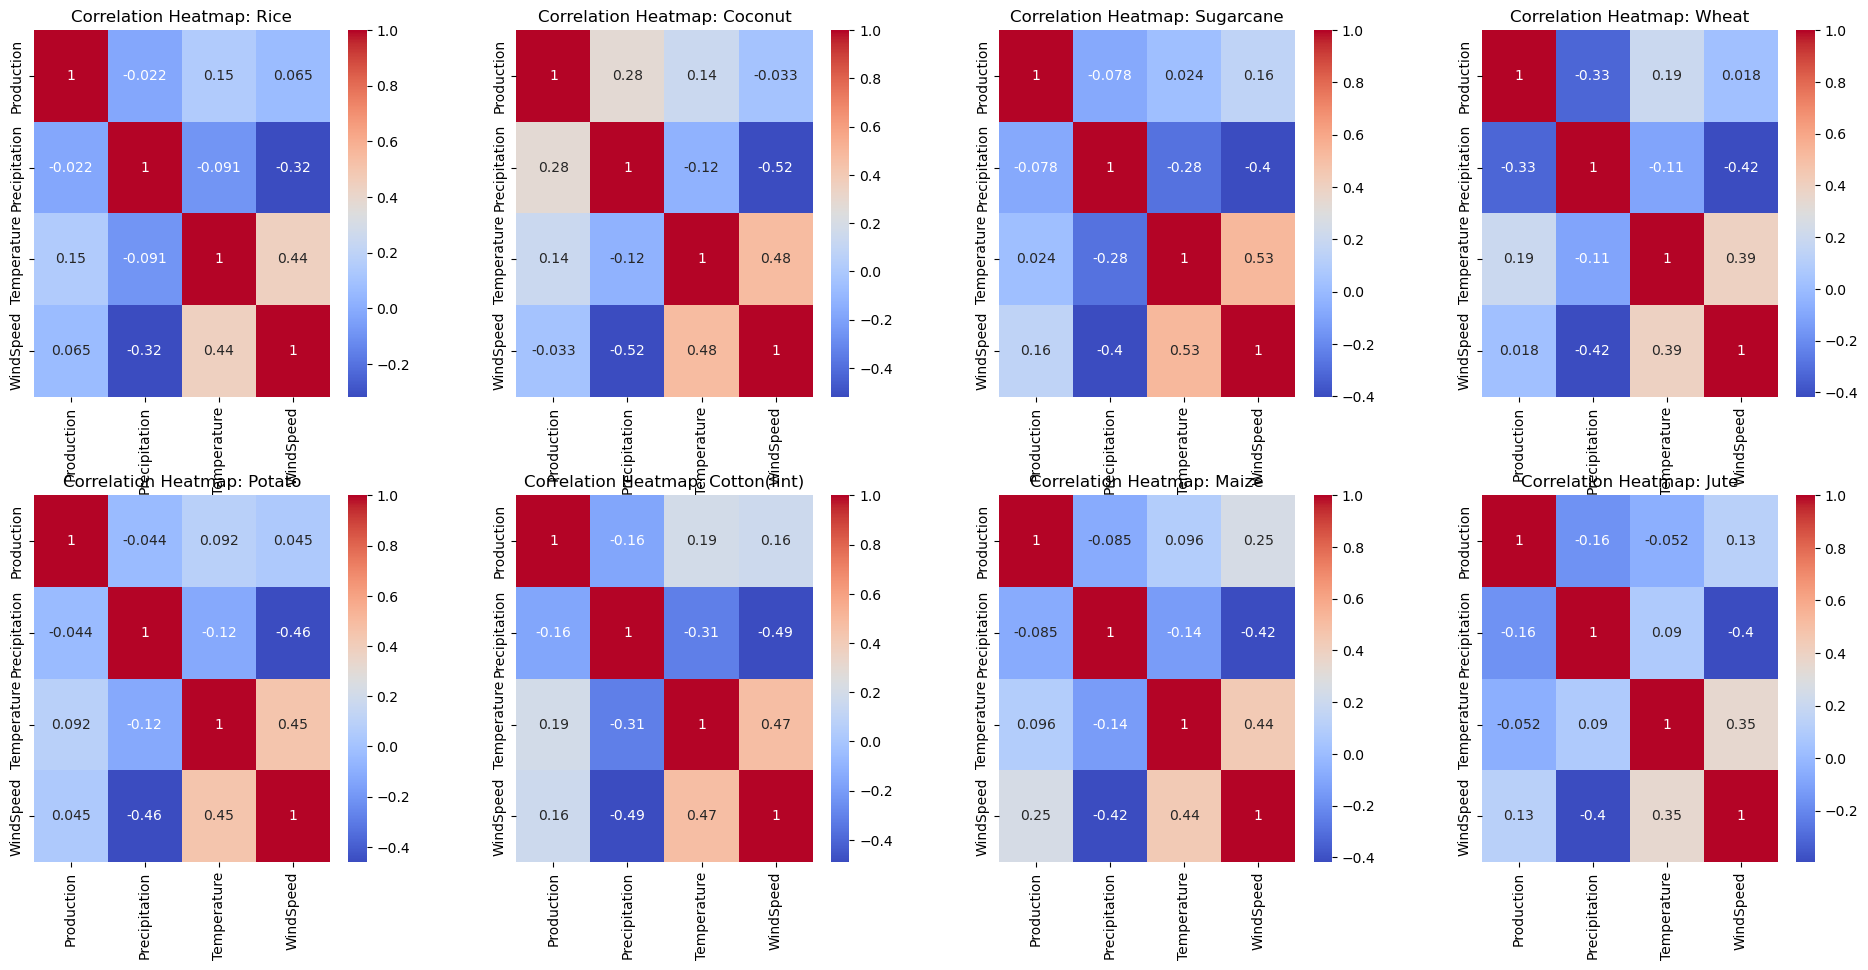

In [154]:
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have df_grouped from previous steps and crops already identified
# Filter for the top 7 crops and Jute
top_crops_and_jute = ['Rice', 'Coconut', 'Sugarcane', 'Wheat', 'Potato', 'Cotton(lint)', 'Maize', 'Jute']
df_top_crops_and_jute = df_grouped[df_grouped['Crop'].isin(top_crops_and_jute)]

# Define function to calculate correlations with p-values
def correlation_with_pvalues(df, col1, col2):
    result = pg.corr(df[col1], df[col2], alternative='two-sided')
    return result['r'].values[0], result['p-val'].values[0]

# Prepare a figure to display the heatmaps in a grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns for 8 heatmaps
fig.tight_layout(pad=5.0)  # Add padding between plots

# Iterate over each crop, calculate the correlation and p-values, and plot the heatmap
for idx, crop in enumerate(top_crops_and_jute):
    # Filter the data for the specific crop
    df_crop = df_top_crops_and_jute[df_top_crops_and_jute['Crop'] == crop]
    
    # Select numeric columns for correlation
    numeric_columns = df_crop[['Production', 'Precipitation', 'Temperature','WindSpeed']]

    # Initialize empty matrices for correlations and p-values
    correlation_matrix = pd.DataFrame(index=numeric_columns.columns, columns=numeric_columns.columns)
    p_value_matrix = pd.DataFrame(index=numeric_columns.columns, columns=numeric_columns.columns)

    # Calculate correlation and p-values
    for col1 in numeric_columns.columns:
        for col2 in numeric_columns.columns:
            corr, pval = correlation_with_pvalues(numeric_columns, col1, col2)
            correlation_matrix.loc[col1, col2] = corr
            p_value_matrix.loc[col1, col2] = pval
    
    # Create the heatmap for the current crop
    ax = axes[idx // 4, idx % 4]  # Define the position in the 2x4 grid
    sns.heatmap(correlation_matrix.astype(float), annot=True, ax=ax, cmap='coolwarm', cbar=True)
    ax.set_title(f"Correlation Heatmap: {crop}")

# Display all the heatmaps
plt.show()

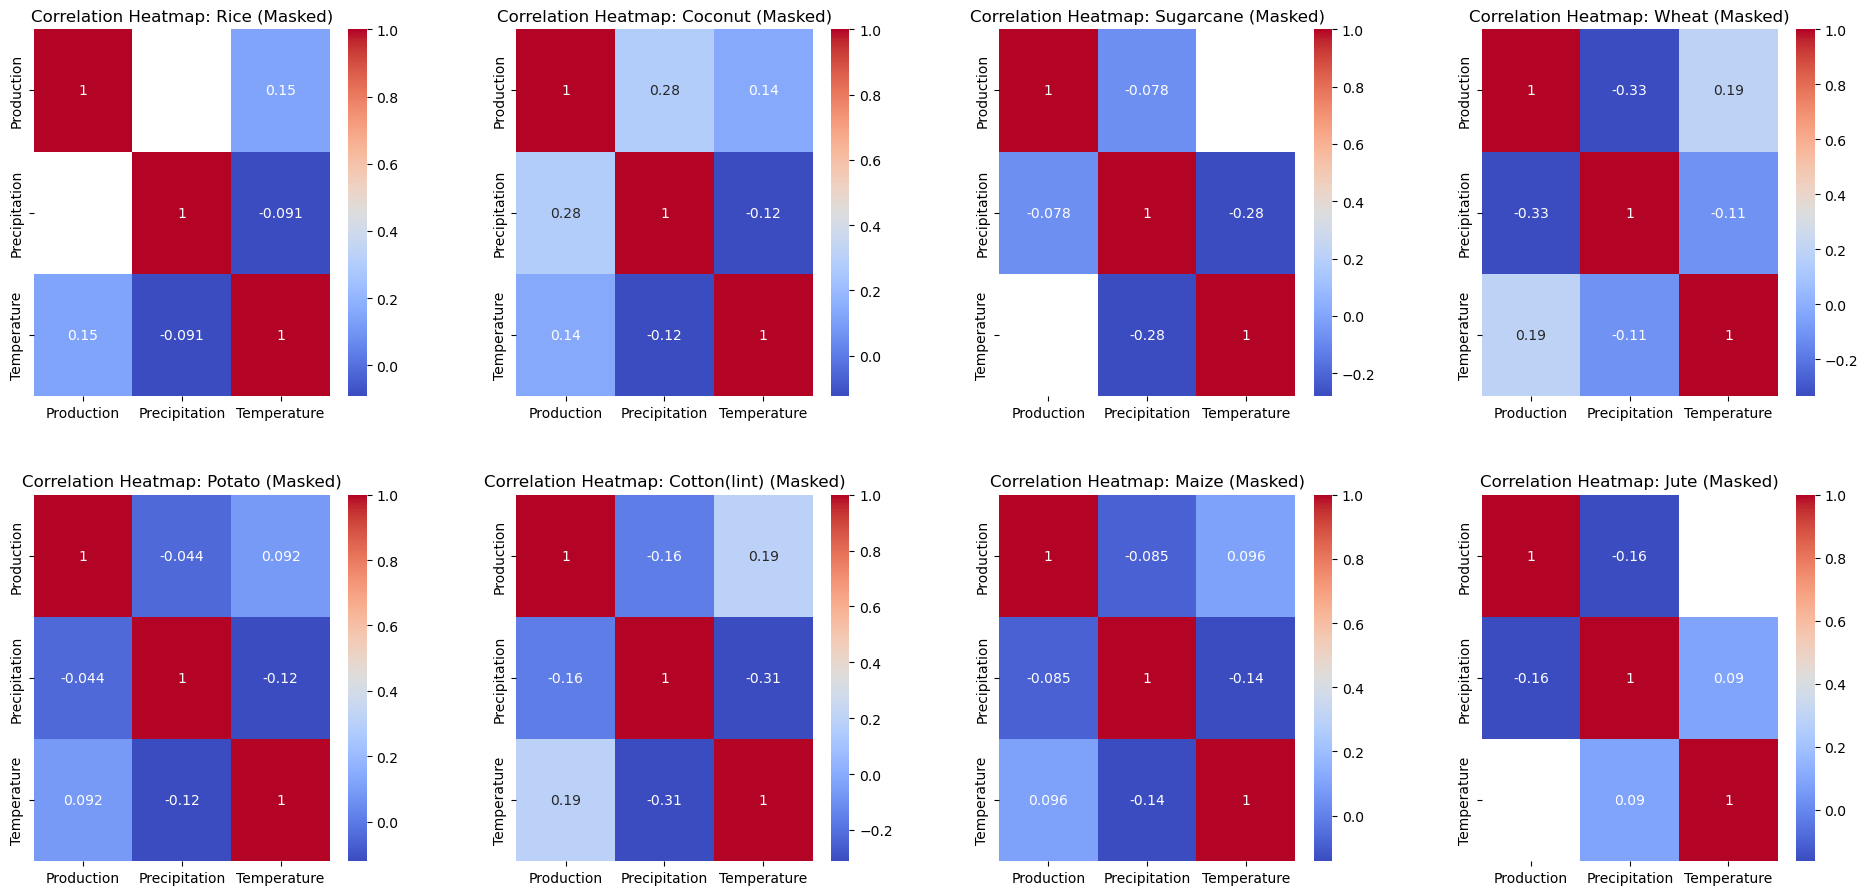

In [156]:
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have df_grouped from previous steps and crops already identified
# Filter for the top 7 crops and Jute
top_crops_and_jute = ['Rice', 'Coconut', 'Sugarcane', 'Wheat', 'Potato', 'Cotton(lint)', 'Maize', 'Jute']
df_top_crops_and_jute = df_grouped[df_grouped['Crop'].isin(top_crops_and_jute)]

# Define function to calculate correlations with p-values
def correlation_with_pvalues(df, col1, col2):
    result = pg.corr(df[col1], df[col2], alternative='two-sided')
    return result['r'].values[0], result['p-val'].values[0]

# Prepare a figure to display the heatmaps in a grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns for 8 heatmaps
fig.tight_layout(pad=5.0)  # Add padding between plots

# Iterate over each crop, calculate the correlation and p-values, and plot the heatmap
for idx, crop in enumerate(top_crops_and_jute):
    # Filter the data for the specific crop
    df_crop = df_top_crops_and_jute[df_top_crops_and_jute['Crop'] == crop]
    
    # Select numeric columns for correlation
    numeric_columns = df_crop[['Production', 'Precipitation', 'Temperature']]

    # Initialize empty matrices for correlations and p-values
    correlation_matrix = pd.DataFrame(index=numeric_columns.columns, columns=numeric_columns.columns)
    p_value_matrix = pd.DataFrame(index=numeric_columns.columns, columns=numeric_columns.columns)

    # Calculate correlation and p-values
    for col1 in numeric_columns.columns:
        for col2 in numeric_columns.columns:
            corr, pval = correlation_with_pvalues(numeric_columns, col1, col2)
            correlation_matrix.loc[col1, col2] = corr
            p_value_matrix.loc[col1, col2] = pval
    
    # Mask non-significant values (p-value > 0.05)
    mask = p_value_matrix > 0.05

    # Create the heatmap for the current crop
    ax = axes[idx // 4, idx % 4]  # Define the position in the 2x4 grid
    sns.heatmap(correlation_matrix.astype(float), annot=True, mask=mask, ax=ax, cmap='coolwarm', cbar=True)
    ax.set_title(f"Correlation Heatmap: {crop} (Masked)")

# Display all the heatmaps
plt.show()

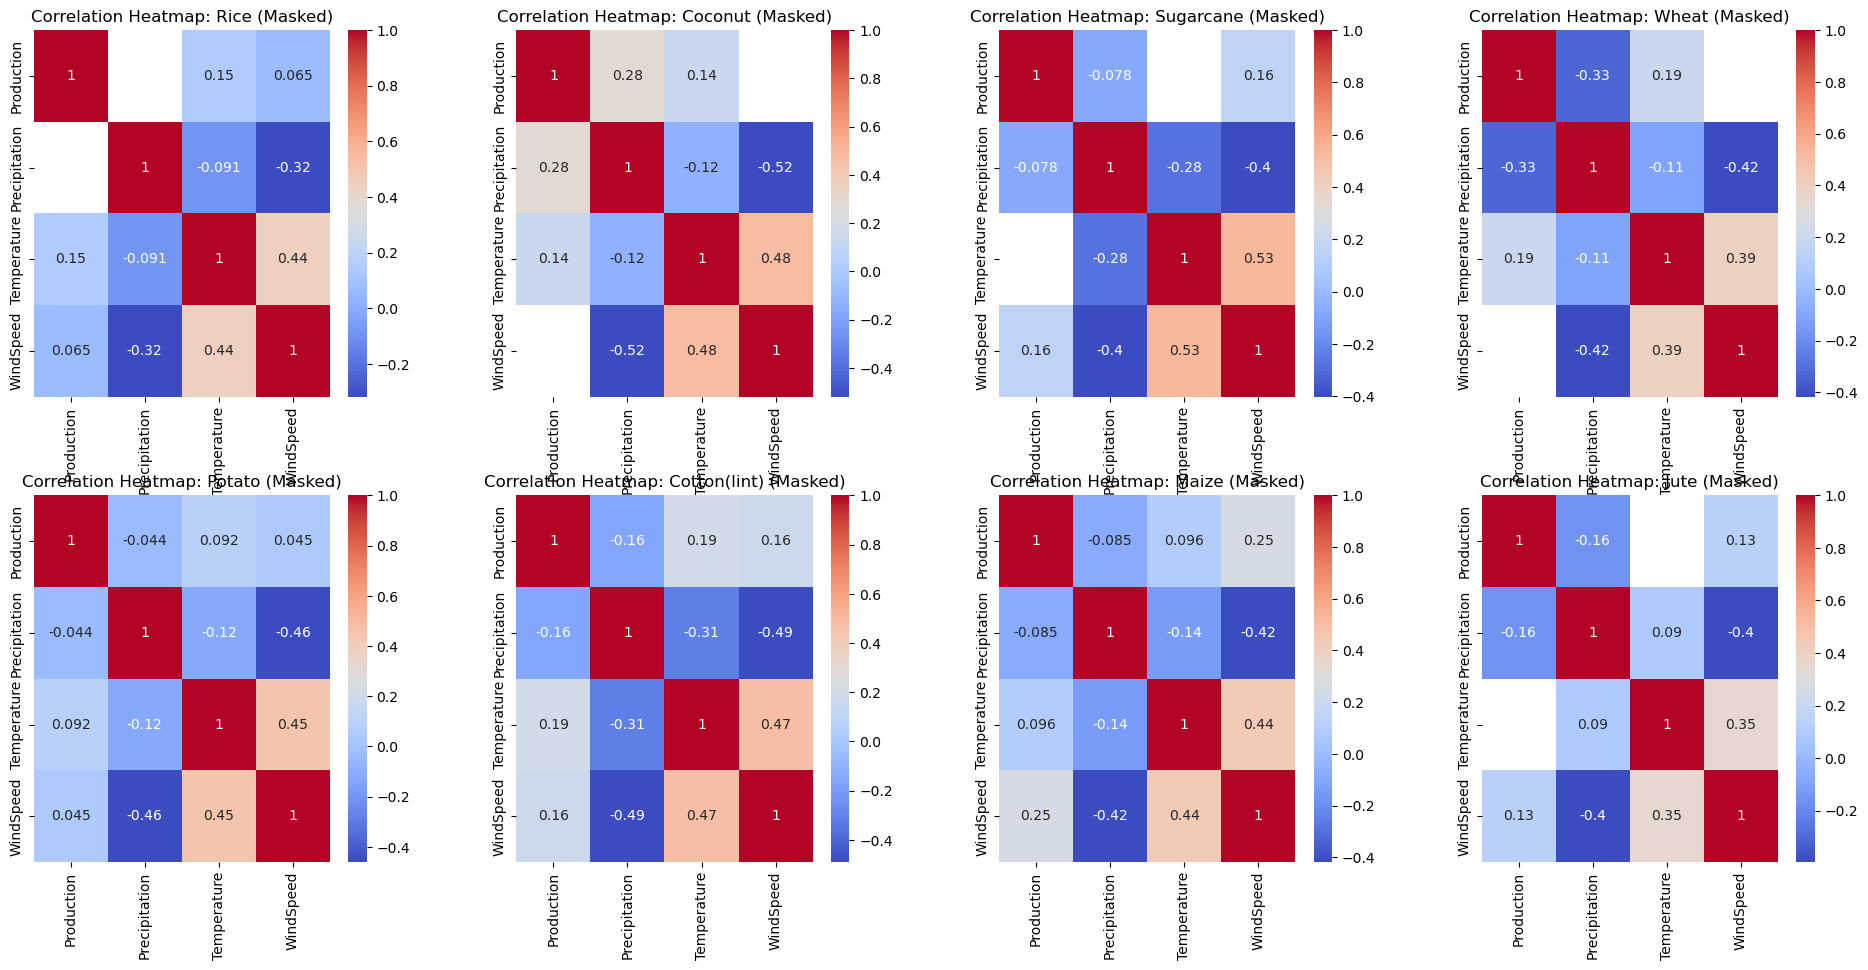

In [158]:
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have df_grouped from previous steps and crops already identified
# Filter for the top 7 crops and Jute
top_crops_and_jute = ['Rice', 'Coconut', 'Sugarcane', 'Wheat', 'Potato', 'Cotton(lint)', 'Maize', 'Jute']
df_top_crops_and_jute = df_grouped[df_grouped['Crop'].isin(top_crops_and_jute)]

# Define function to calculate correlations with p-values
def correlation_with_pvalues(df, col1, col2):
    result = pg.corr(df[col1], df[col2], alternative='two-sided')
    return result['r'].values[0], result['p-val'].values[0]

# Prepare a figure to display the heatmaps in a grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns for 8 heatmaps
fig.tight_layout(pad=5.0)  # Add padding between plots

# Iterate over each crop, calculate the correlation and p-values, and plot the heatmap
for idx, crop in enumerate(top_crops_and_jute):
    # Filter the data for the specific crop
    df_crop = df_top_crops_and_jute[df_top_crops_and_jute['Crop'] == crop]
    
    # Select numeric columns for correlation, now including WindSpeed
    numeric_columns = df_crop[['Production', 'Precipitation', 'Temperature', 'WindSpeed']]

    # Initialize empty matrices for correlations and p-values
    correlation_matrix = pd.DataFrame(index=numeric_columns.columns, columns=numeric_columns.columns)
    p_value_matrix = pd.DataFrame(index=numeric_columns.columns, columns=numeric_columns.columns)

    # Calculate correlation and p-values
    for col1 in numeric_columns.columns:
        for col2 in numeric_columns.columns:
            corr, pval = correlation_with_pvalues(numeric_columns, col1, col2)
            correlation_matrix.loc[col1, col2] = corr
            p_value_matrix.loc[col1, col2] = pval
    
    # Mask non-significant values (p-value > 0.05)
    mask = p_value_matrix > 0.05

    # Create the heatmap for the current crop
    ax = axes[idx // 4, idx % 4]  # Define the position in the 2x4 grid
    sns.heatmap(correlation_matrix.astype(float), annot=True, mask=mask, ax=ax, cmap='coolwarm', cbar=True)
    ax.set_title(f"Correlation Heatmap: {crop} (Masked)")

# Display all the heatmaps
plt.show()

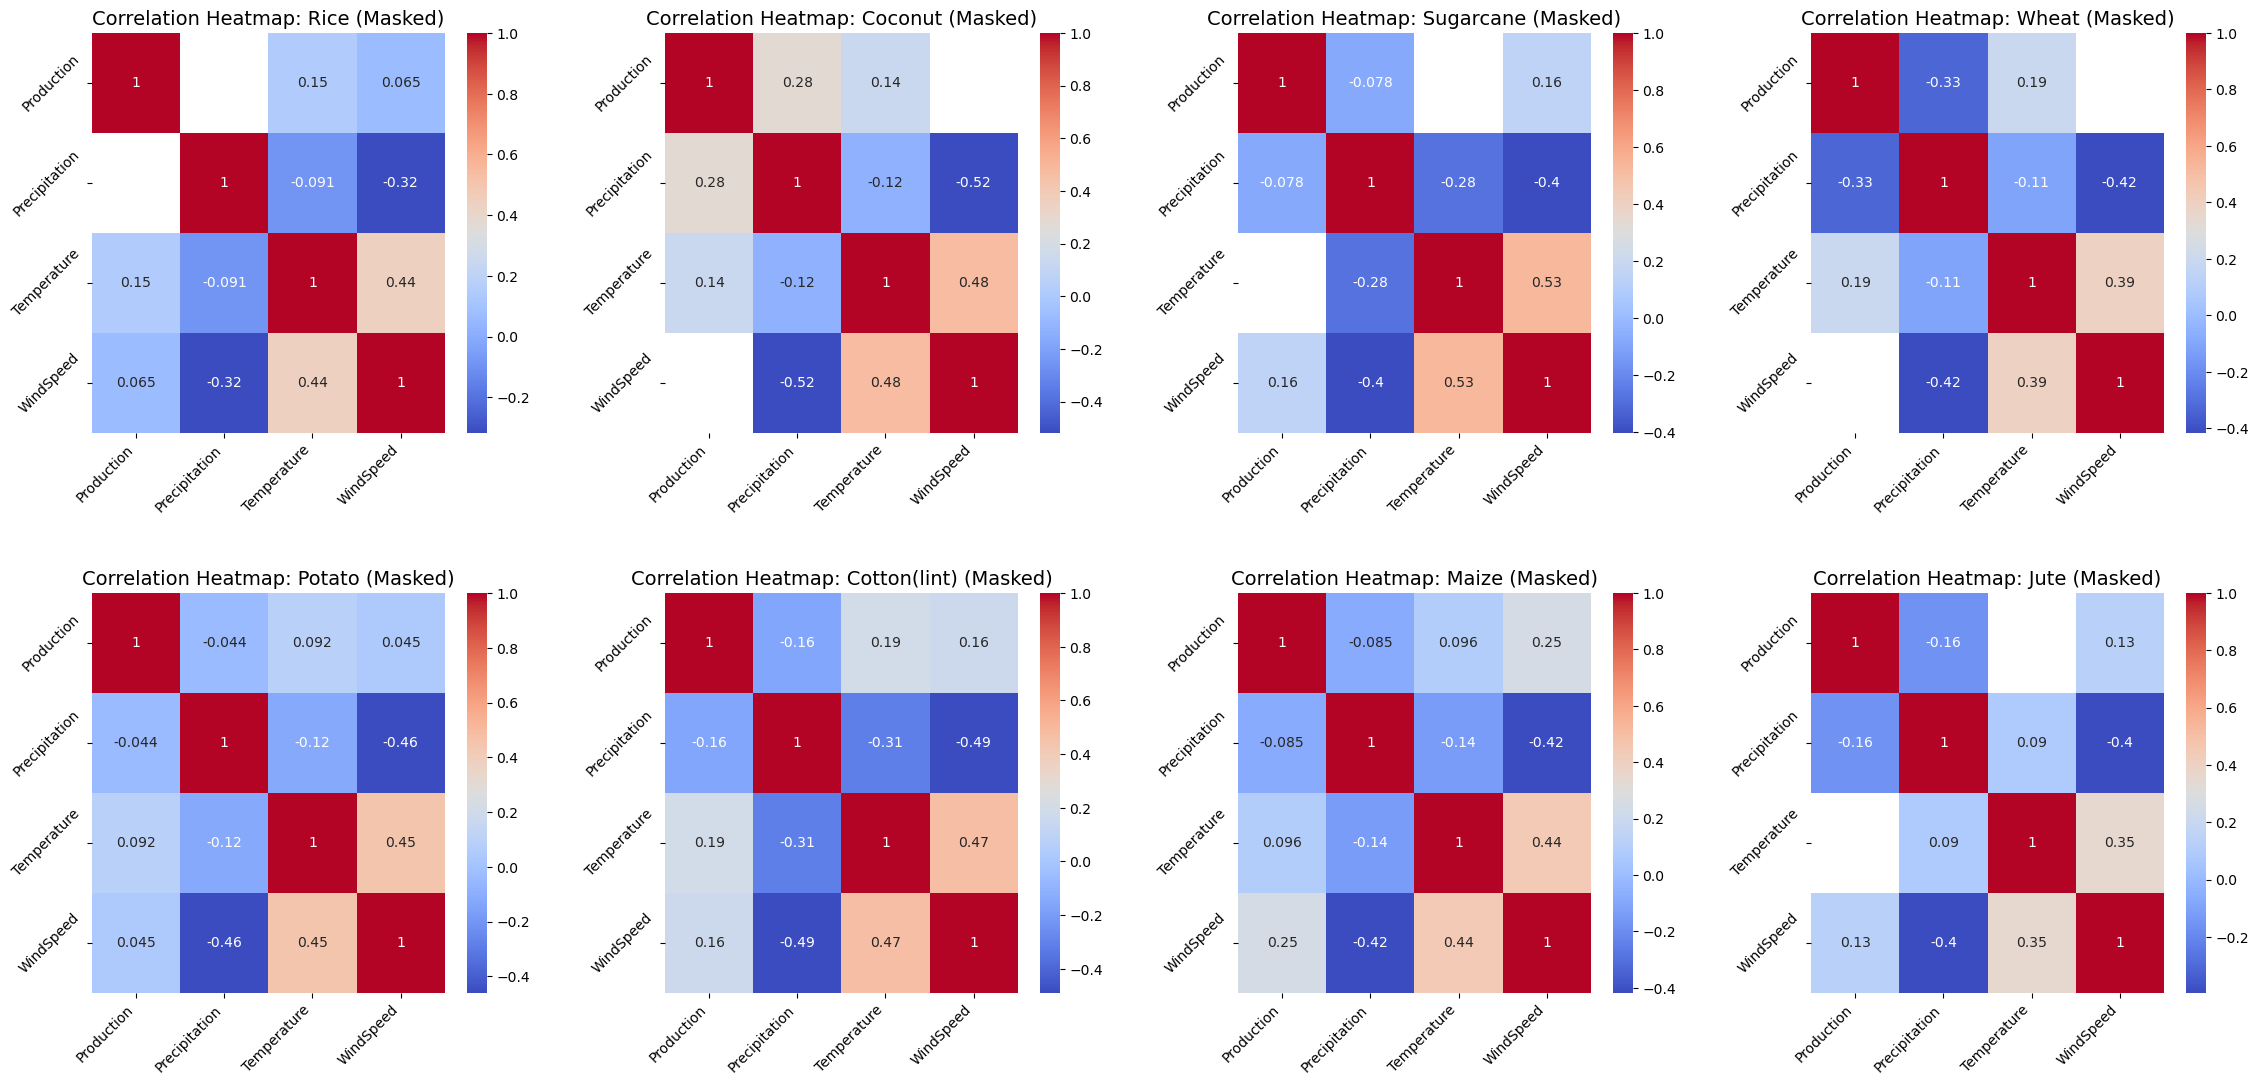

In [160]:
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have df_grouped from previous steps and crops already identified
# Filter for the top 7 crops and Jute
top_crops_and_jute = ['Rice', 'Coconut', 'Sugarcane', 'Wheat', 'Potato', 'Cotton(lint)', 'Maize', 'Jute']
df_top_crops_and_jute = df_grouped[df_grouped['Crop'].isin(top_crops_and_jute)]

# Define function to calculate correlations with p-values
def correlation_with_pvalues(df, col1, col2):
    result = pg.corr(df[col1], df[col2], alternative='two-sided')
    return result['r'].values[0], result['p-val'].values[0]
# Prepare a figure to display the heatmaps in a grid with adjusted size
fig, axes = plt.subplots(2, 4, figsize=(24, 12))  # Adjust the figure size for better readability
fig.tight_layout(pad=6.0)  # Increase padding between the subplots
# Iterate over each crop, calculate the correlation and p-values
for idx, crop in enumerate(top_crops_and_jute):
    
    df_crop = df_top_crops_and_jute[df_top_crops_and_jute['Crop'] == crop]
    
    
    numeric_columns = df_crop[['Production', 'Precipitation', 'Temperature', 'WindSpeed']]

    
    correlation_matrix = pd.DataFrame(index=numeric_columns.columns, columns=numeric_columns.columns)
    p_value_matrix = pd.DataFrame(index=numeric_columns.columns, columns=numeric_columns.columns)

    
    for col1 in numeric_columns.columns:
        for col2 in numeric_columns.columns:
            corr, pval = correlation_with_pvalues(numeric_columns, col1, col2)
            correlation_matrix.loc[col1, col2] = corr
            p_value_matrix.loc[col1, col2] = pval
    
    # Mask non-significant values (p-value > 0.05)
    mask = p_value_matrix > 0.05

    # Create the heatmap for the current crop
    ax = axes[idx // 4, idx % 4]  # Define the position in the 2x4 grid
    sns.heatmap(correlation_matrix.astype(float), annot=True, mask=mask, ax=ax, cmap='coolwarm', cbar=True)
    ax.set_title(f"Correlation Heatmap: {crop} (Masked)", fontsize=14)  # Increase title font size for clarity

    # Optional: Rotate axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

# Adjust the layout again to ensure no overlap
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

# Show all heatmaps
plt.show()


In [164]:
# Check for 'MUMBAI', 'BOMBAY', or 'MAHARASHTRA' in the District or State columns
districts_containing_mumbai = df_final['District'].str.contains('BIHARA', case=False, na=False)

# Display the results
if districts_containing_mumbai.any():
    print(df_final[districts_containing_mumbai])
else:
    print("No rows found for Bihara in the District column.")

No rows found for Bihara in the District column.


In [93]:
# Check for 'MUMBAI', 'BOMBAY', or 'MAHARASHTRA' in the District or State columns
districts_containing_mumbai = df_final['District'].str.contains('MUMBAI|BOMBAY|MAHARASHTRA|KONKAN', case=False, na=False)

# Display the results
if districts_containing_mumbai.any():
    print(df_final[districts_containing_mumbai])
else:
    print("No rows found for Mumbai, Bombay, or Maharashtra in the District column.")

No rows found for Mumbai, Bombay, or Maharashtra in the District column.


In [95]:
df_final.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Year', 'District', 'Temperature', 'Precipitation',
       'WindSpeed'],
      dtype='object')

In [97]:
df_final["State_Name"].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [99]:
# Filter the data for Maharashtra
df_maharashtra = df_final[df_final['State_Name'].str.contains('Maharashtra', case=False)]

df_maharashtra.head()


State_Name District_Name  Crop_Year  Season          Crop      Area  \
96893  Maharashtra    AHMEDNAGAR       2002  Kharif     Arhar/Tur   14600.0   
96894  Maharashtra    AHMEDNAGAR       2002  Kharif         Bajra  218400.0   
96895  Maharashtra    AHMEDNAGAR       2002  Kharif   Castor seed     100.0   
96896  Maharashtra    AHMEDNAGAR       2002  Kharif  Cotton(lint)   10800.0   
96897  Maharashtra    AHMEDNAGAR       2002  Kharif     Groundnut    5800.0   

       Production  Year    District  Temperature  Precipitation  WindSpeed  
96893      5700.0  2002  AHMEDNAGAR    26.234822       1.285151   4.066301  
96894    158900.0  2002  AHMEDNAGAR    26.234822       1.285151   4.066301  
96895        10.0  2002  AHMEDNAGAR    26.234822       1.285151   4.066301  
96896      8300.0  2002  AHMEDNAGAR    26.234822       1.285151   4.066301  
96897      4000.0  2002  AHMEDNAGAR    26.234822       1.285151   4.066301

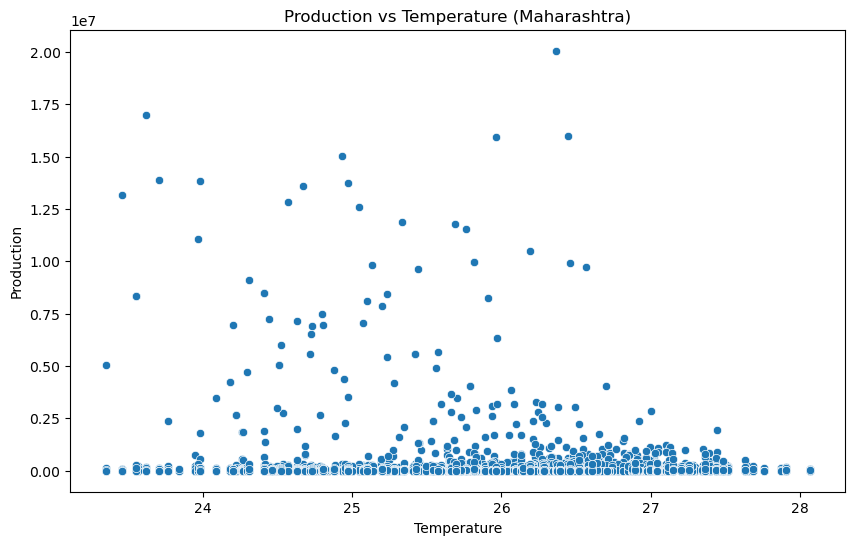

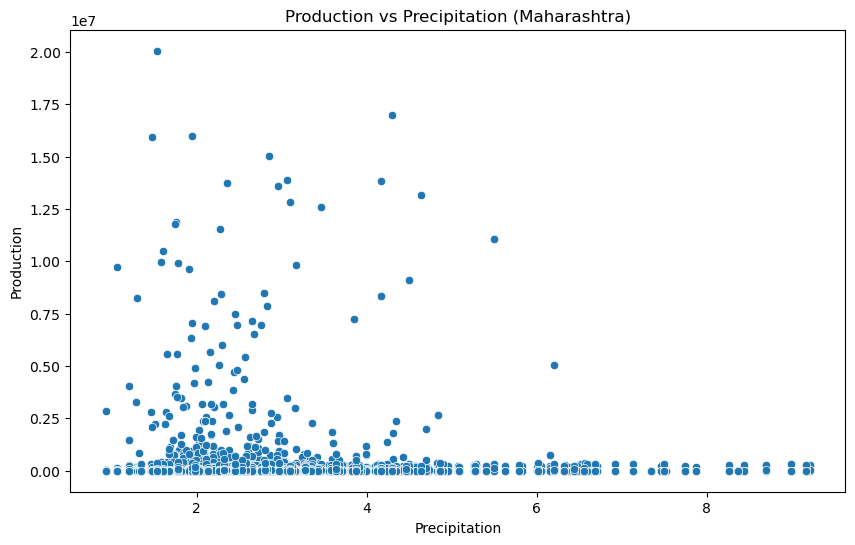

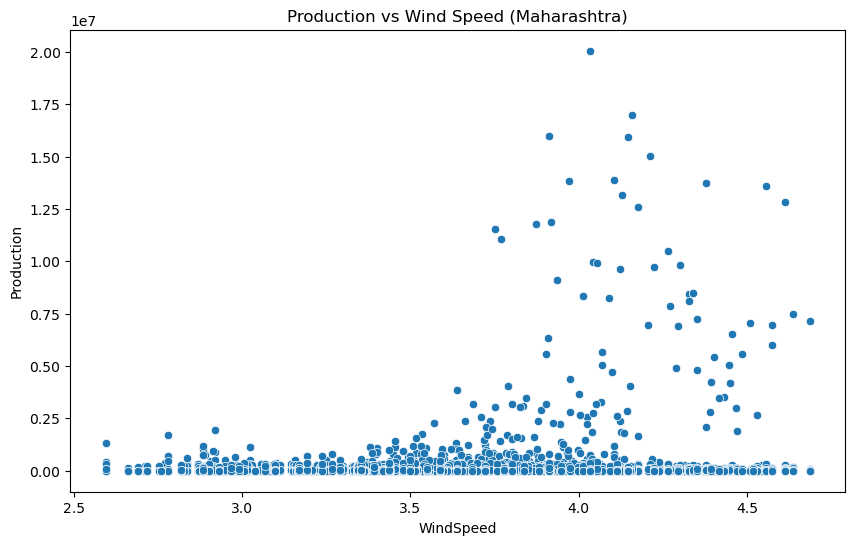

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Production', data=df_maharashtra)
plt.title('Production vs Temperature (Maharashtra)')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Precipitation', y='Production', data=df_maharashtra)
plt.title('Production vs Precipitation (Maharashtra)')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='WindSpeed', y='Production', data=df_maharashtra)
plt.title('Production vs Wind Speed (Maharashtra)')
plt.show()


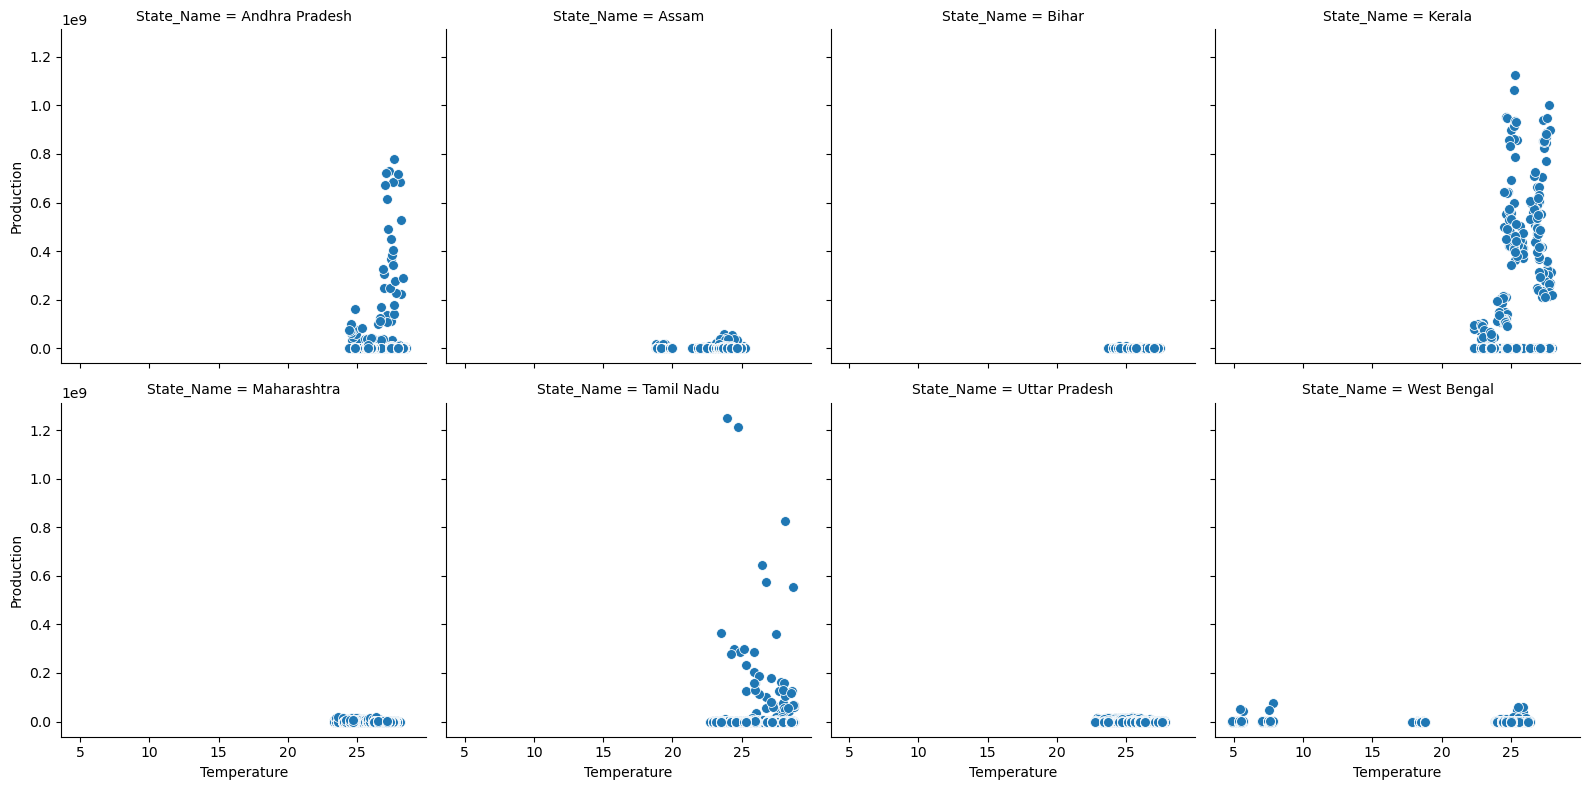

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import numpy as np

# Step 1: Identify the top 7 states with the highest production
df_grouped_states = df_final.groupby('State_Name').agg({
    'Production': 'sum',
    'Temperature': 'mean',
}).reset_index()

# Get the top 7 states with the highest production
top_7_states = df_grouped_states.nlargest(7, 'Production')['State_Name'].tolist()

# Include 'Bihar' manually if not already included
if 'Bihar' not in top_7_states:
    top_7_states.append('Bihar')

# Filter the original data to only include these states
df_top_states = df_final[df_final['State_Name'].isin(top_7_states)]

# Step 2: Create Scatter Plots of Production vs. Temperature for the top 7 states and Bihar
g = sns.FacetGrid(df_top_states, col="State_Name", col_wrap=4, height=4)
g.map(sns.scatterplot, "Temperature", "Production", s=50)  # Scatter plot with larger markers

# Show the scatter plot panel
plt.show()

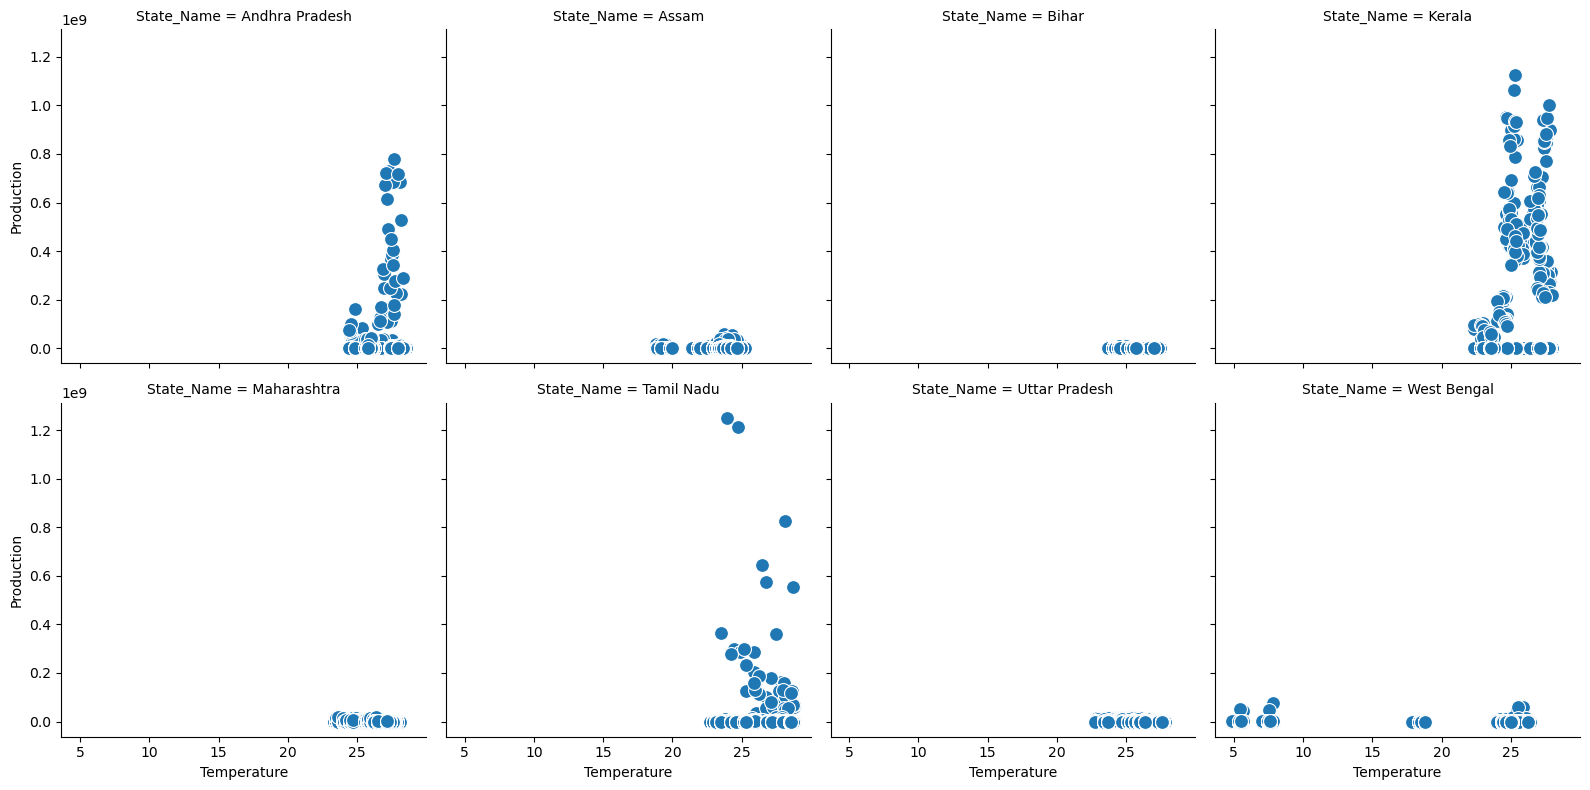

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Identify the top 7 states with the highest production
df_grouped_states = df_final.groupby('State_Name').agg({
    'Production': 'sum',
    'Temperature': 'mean',
}).reset_index()

# Get the top 7 states with the highest production
top_7_states = df_grouped_states.nlargest(7, 'Production')['State_Name'].tolist()

# Include 'Bihar' manually
top_7_states.append('Bihar')

# Filter the original data to only include these states
df_top_states = df_final[df_final['State_Name'].isin(top_7_states)]

# Step 2: Create Scatter Plots of Production vs. Temperature for the top 7 states and Bihar
g = sns.FacetGrid(df_top_states, col="State_Name", col_wrap=4, height=4)
g.map(sns.scatterplot, "Temperature", "Production", s=100)  # Scatter plot with larger markers

# Show the updated scatter plot panel
plt.show()


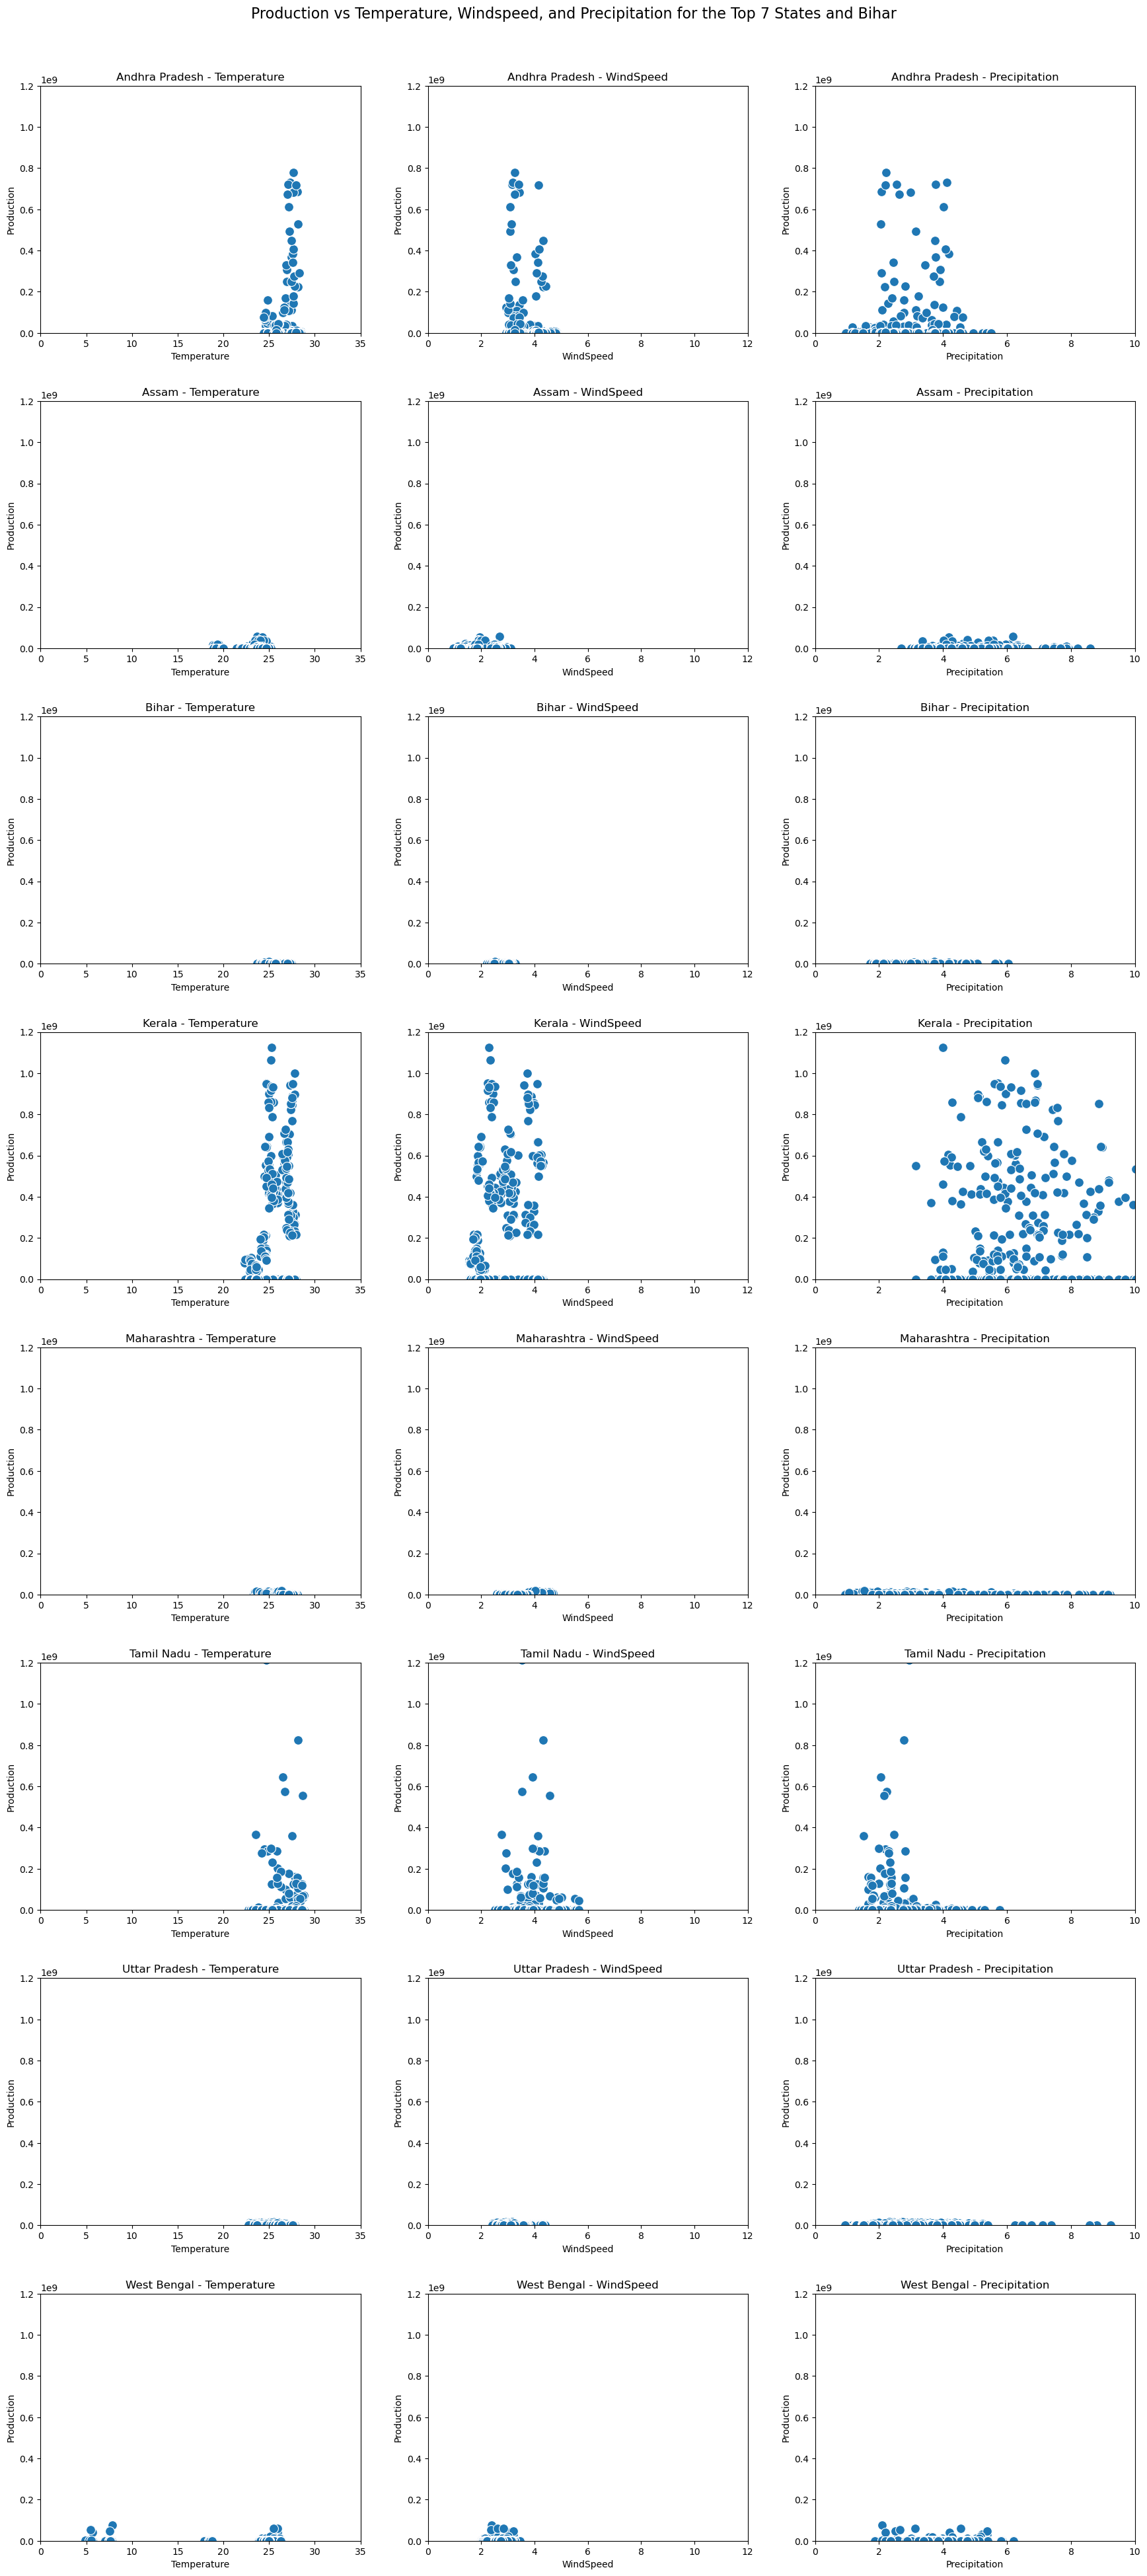

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of states and variables
states = df_top_states['State_Name'].unique()  # Get unique states from your data
variables = ['Temperature', 'WindSpeed', 'Precipitation']  # Variables to compare with Production

# Prepare the plot grid with 3 columns for each variable
fig, axes = plt.subplots(len(states), 3, figsize=(18, 5 * len(states)))  # Adjust the figure size to fit all subplots

# Iterate over each state and plot the relationships for each variable
for i, state in enumerate(states):
    # Filter data for the specific state
    df_state = df_top_states[df_top_states['State_Name'] == state]
    
    for j, var in enumerate(variables):
        # Plot the scatter plot for the state and variable
        sns.scatterplot(x=var, y='Production', data=df_state, ax=axes[i, j], s=100)

        # Set the axis limits for better comparison
        axes[i, j].set_ylim(0, 1.2e9)  # Set consistent limits for production
        if var == 'Temperature':
            axes[i, j].set_xlim(0, 35)  # Adjust temperature range
        elif var == 'WindSpeed':
            axes[i, j].set_xlim(0, 12)  # Adjust windspeed range
        elif var == 'Precipitation':
            axes[i, j].set_xlim(0, 10)  # Adjust precipitation range
        
        # Set titles for each subplot
        axes[i, j].set_title(f"{state} - {var}")
        axes[i, j].set_xlabel(var)
        axes[i, j].set_ylabel('Production')

# Set a global title and adjust layout
plt.suptitle("Production vs Temperature, Windspeed, and Precipitation for the Top 7 States and Bihar", fontsize=16)
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.95)  # Adjust space for the global title
plt.show()

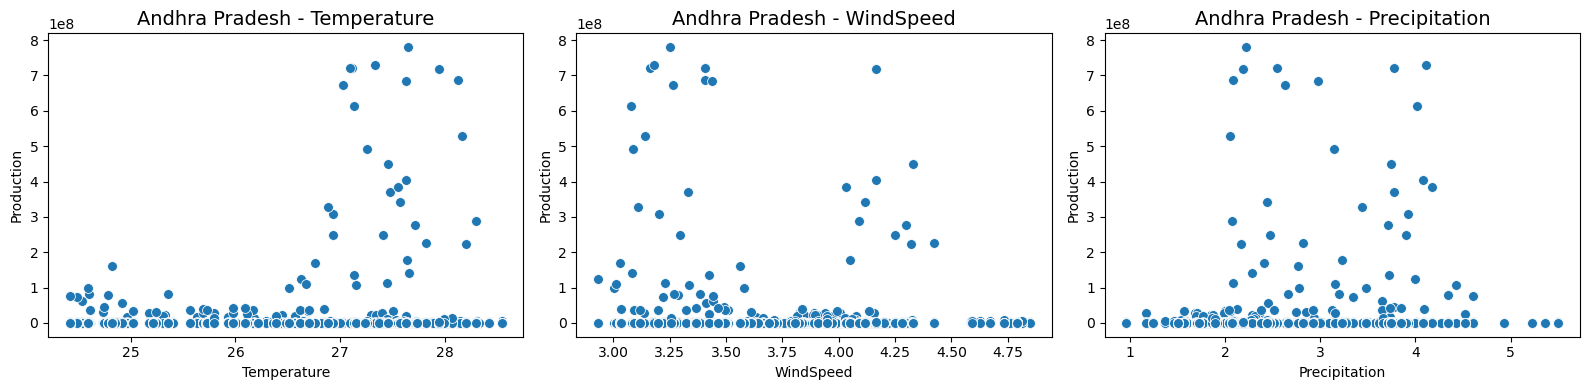

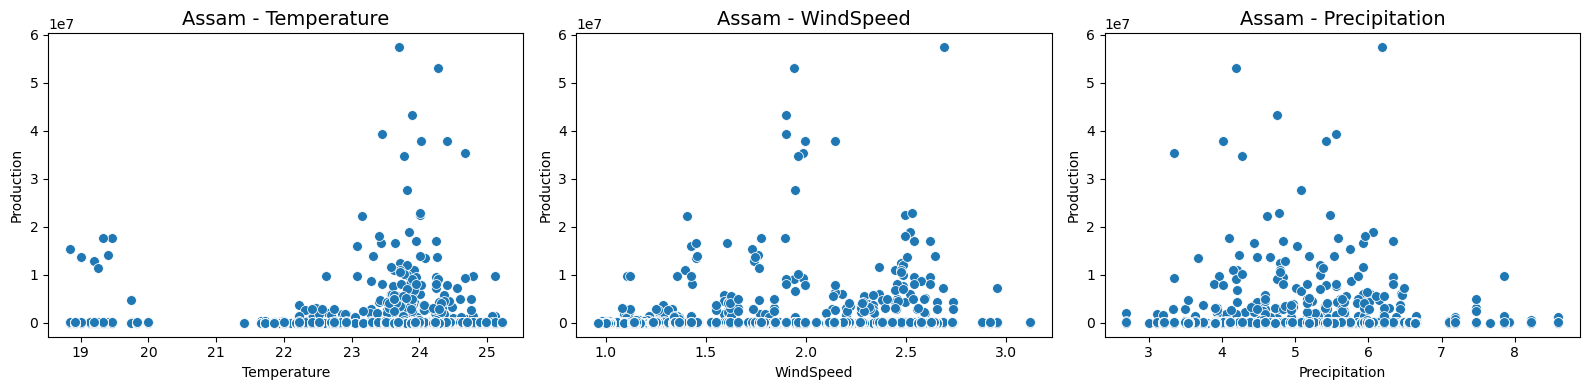

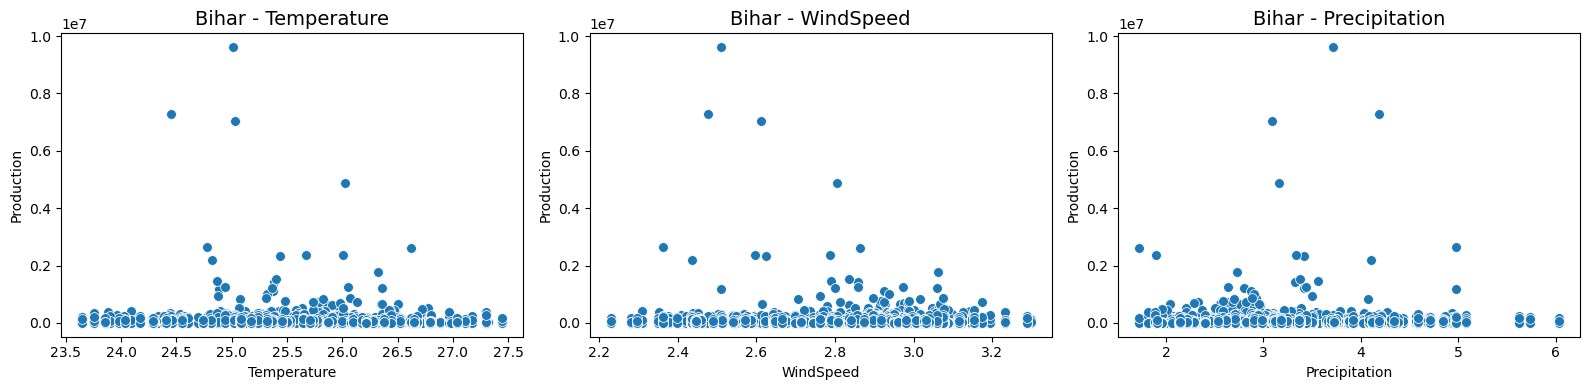

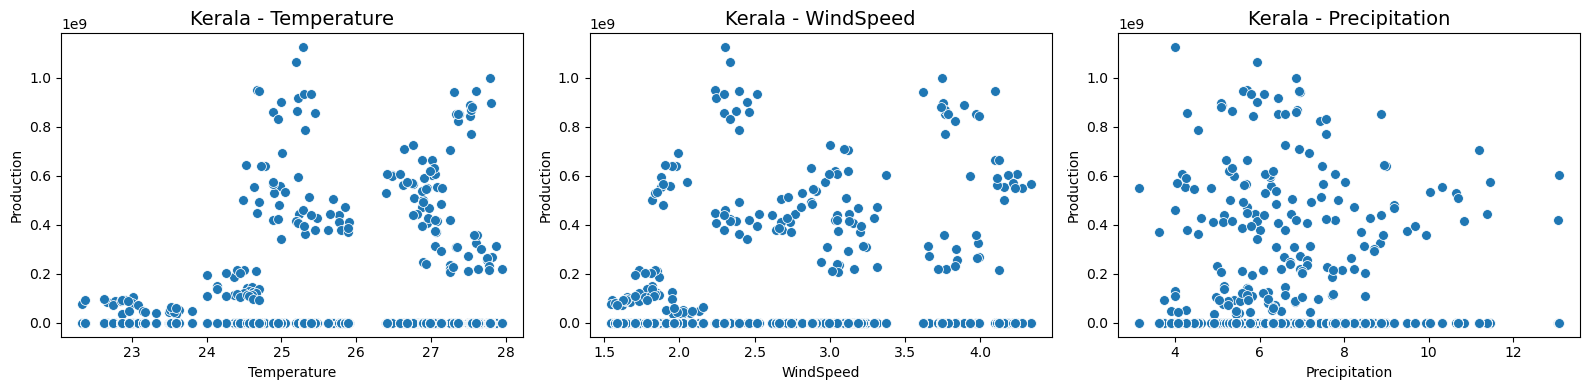

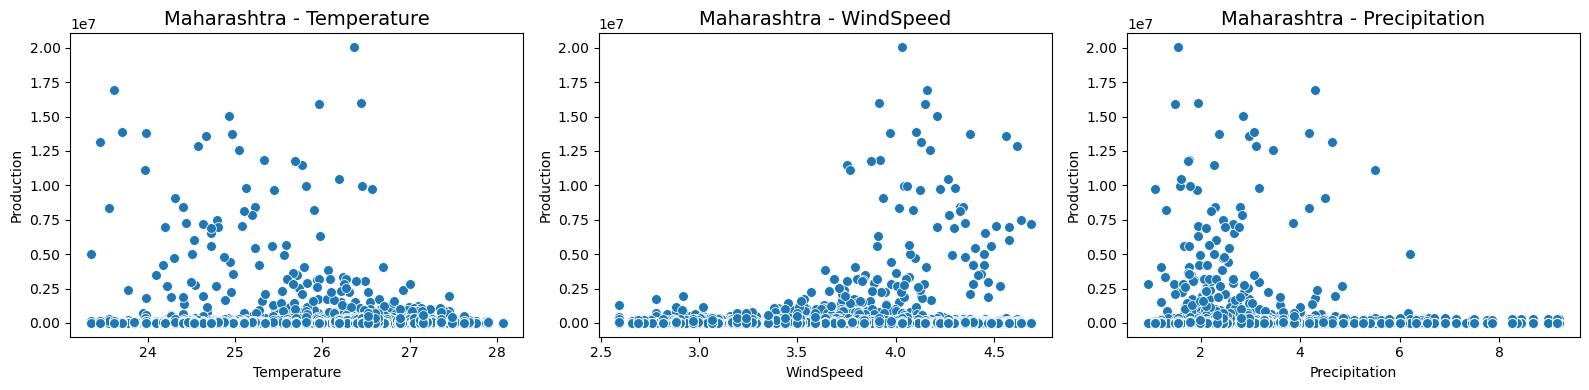

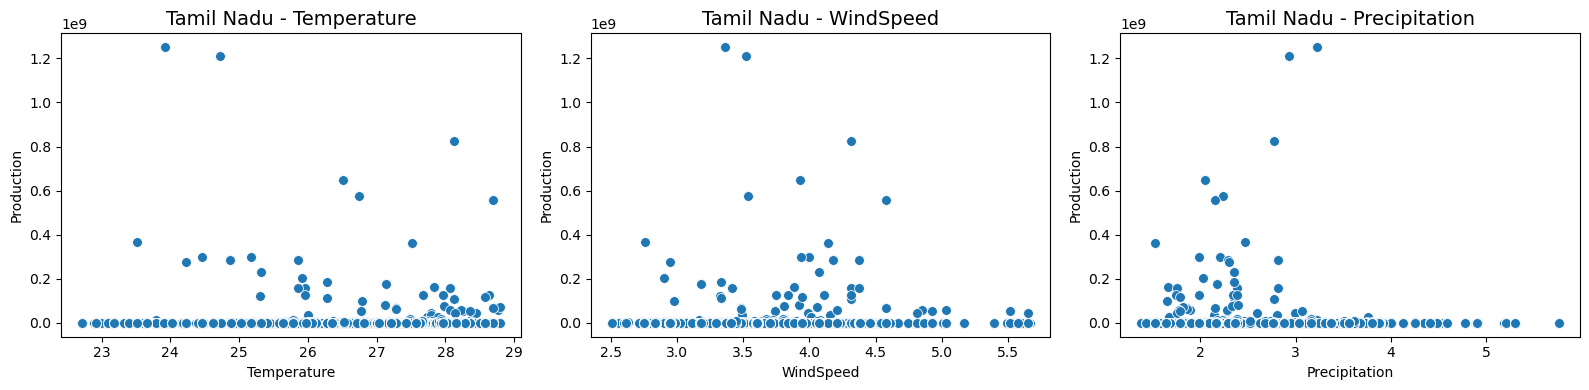

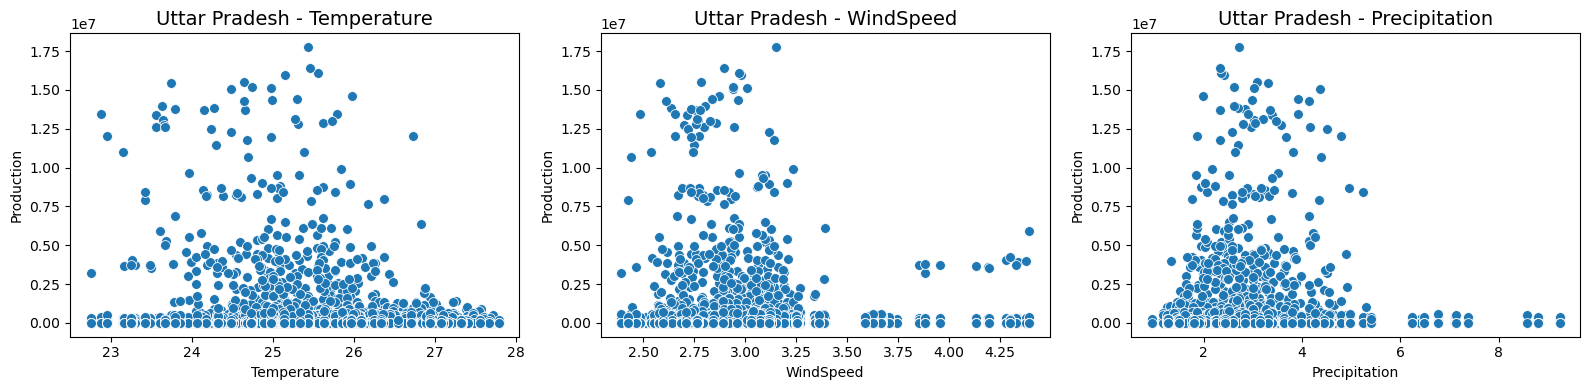

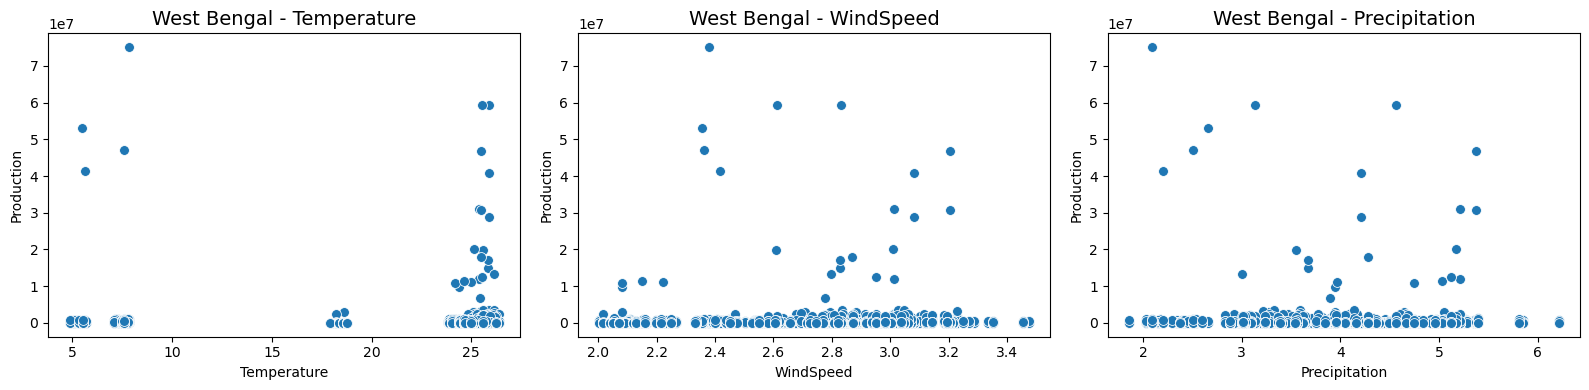

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_top_states is already filtered for the top 7 states + Bihar

# Step 1: Create a FacetGrid panel for each state
variables = ['Temperature', 'WindSpeed', 'Precipitation']

# Create a grid for each state and plot all the variables against Production
for state in df_top_states['State_Name'].unique():
    df_state = df_top_states[df_top_states['State_Name'] == state]
    
    fig, axes = plt.subplots(1, len(variables), figsize=(16, 4))  # 1 row, 3 columns for the variables
    
    # Loop through the variables and create a scatter plot for each
    for i, var in enumerate(variables):
        sns.scatterplot(x=var, y='Production', data=df_state, ax=axes[i], s=50)
        axes[i].set_title(f'{state} - {var}', fontsize=14)
        
        # Get the current x and y limits for better axis scaling
        ymin, ymax = axes[i].get_ylim()
        xmin, xmax = axes[i].get_xlim()
        
        # Adjust y-limits and x-limits (can be customized further if needed)
        axes[i].set_ylim(bottom=ymin, top=ymax)
        axes[i].set_xlim(left=xmin, right=xmax)
    
    plt.tight_layout()
    plt.show()

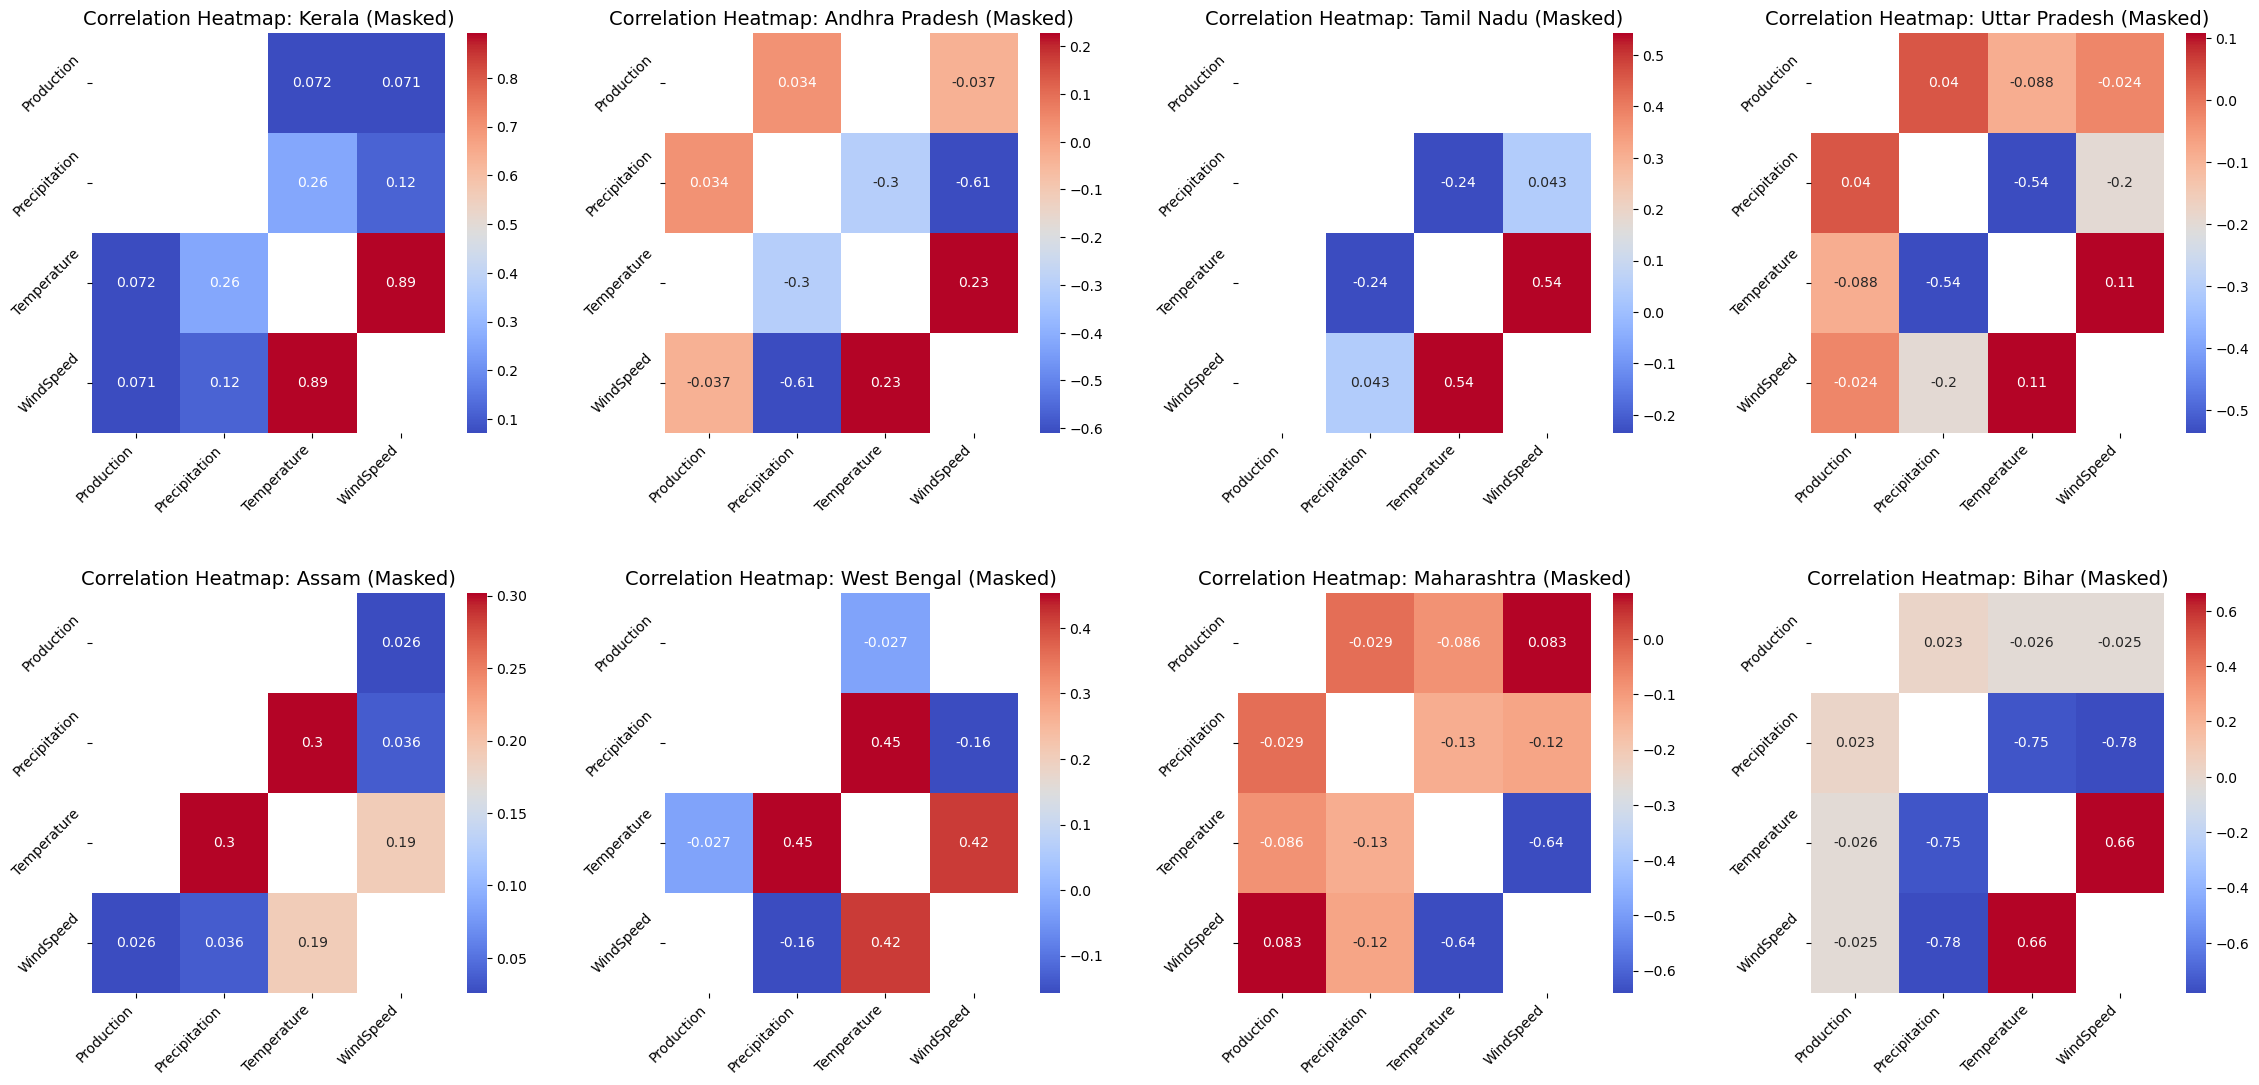

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg

# Define function to calculate correlations with p-values and handle empty columns
def correlation_with_pvalues(df, col1, col2):
    # Drop rows where either col1 or col2 has NaN values
    valid_data = df[[col1, col2]].dropna()
    
    # Ensure both columns are 1D arrays of numeric types
    if valid_data.empty or not pd.api.types.is_numeric_dtype(valid_data[col1]) or not pd.api.types.is_numeric_dtype(valid_data[col2]):
        return None, None  # Skip correlation if no valid data or non-numeric data exists
    else:
        result = pg.corr(valid_data[col1], valid_data[col2], alternative='two-sided')
        return result['r'].values[0], result['p-val'].values[0]

# Prepare a figure to display the heatmaps in a grid
fig, axes = plt.subplots(2, 4, figsize=(24, 12))  # Adjust the figure size for better readability
fig.tight_layout(pad=6.0)  # Increase padding between the subplots

# Iterate over each state, calculate the correlation and p-values, and plot the heatmap
for idx, state in enumerate(top_7_states):
    # Filter the data for the specific state
    df_state = df_final[df_final['State_Name'] == state]
    
    # Select numeric columns for correlation, including WindSpeed this time
    numeric_columns = df_state[['Production', 'Precipitation', 'Temperature', 'WindSpeed']]

    # Initialize empty matrices for correlations and p-values
    correlation_matrix = pd.DataFrame(index=numeric_columns.columns, columns=numeric_columns.columns)
    p_value_matrix = pd.DataFrame(index=numeric_columns.columns, columns=numeric_columns.columns)

    # Calculate correlation and p-values
    for col1 in numeric_columns.columns:
        for col2 in numeric_columns.columns:
            if numeric_columns[col1].dropna().empty or numeric_columns[col2].dropna().empty:
                corr, pval = None, None  # Skip correlation if all values are NaN
            else:
                corr, pval = correlation_with_pvalues(numeric_columns, col1, col2)
                
            correlation_matrix.loc[col1, col2] = corr if corr is not None else np.nan
            p_value_matrix.loc[col1, col2] = pval if pval is not None else np.nan
    
    # Mask non-significant values (p-value > 0.05)
    mask = p_value_matrix > 0.05

    # Create the heatmap for the current state
    ax = axes[idx // 4, idx % 4]  # Define the position in the 2x4 grid
    sns.heatmap(correlation_matrix.astype(float), annot=True, mask=mask, ax=ax, cmap='coolwarm', cbar=True)
    ax.set_title(f"Correlation Heatmap: {state} (Masked)", fontsize=14)  # Increase title font size for clarity

    # Optional: Rotate axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

# Adjust the layout again to ensure no overlap
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

# Show all heatmaps
plt.show()
